<a href="https://colab.research.google.com/github/Shahrukh2016/Retail_Sales_Prediction/blob/main/IndividualColab_RetailSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Supervised Regression
##### **Contribution**    - Individual

# **Project Summary -**

Rossman Sales Prediction data is a data set that contain historical sales data for a retail store chain. The data includes information about the store, such as Competitior’s Detail, type, holiday’s, as well as number of the customers and sales transaction, such as the date, time, and amount of sale on each day.

After understanding the data and getting variables, we first gathered and clean the data, and handled the null values and finally for getting better results we merged two datasets on inner join after that we have also typecasted the needed features into required format in order to visualize them properly. We performed indepth EDA plotted different types of graphs by separating them into univariate, bivariate and multivariate categories and we gathered many good insights from it that helped us to make future decisions of ML model pipeline. Then further on, using feature engineering and data preprocessing  we have extracted features like PromoDuration and CompetitionDuration that helped us to get rid of some 4 features that are not directly impacting our Sales. We also tried to get some impacting features by removing multicollinearity by reducing the various inflation factor(VIF) of the independent variables. Under the umbrella of feature engineering we have also defined two codes for  outliers detection and outliers treatment with the help of IQR technique and capped all the outliers of continous features in 25-75 percentile. Also, we have noticed that some of the features were categorical in nature and ML model can not understand the language of alphabets(strings). So, we have encoded them into numericals using One-Hot Encoding technique as they were unordered in nature. 

Now as we are ready with our final features but still there were two problems with us. First is we don't have normally distributed data with us which is very essential as having normally distributed data is the one of the assuptions of linear model such as Linear Regression. And the other is we don't have the data on the same scale i.e values are lying far apart from each other. In order to get normally distributed data we have applied various transformation techniques such as Logarithmic Transformation, Exponential Transformation, Square root Transformation and others as well and plotted the quantie-quantile plot for visualizing how far our data points are from the normal distributions. For our second challenge i.e data on same scale we have used the sklearn library StandardScaler to scale the data.

At last we splited the dataset into training and testing sets. Next, we choose various linear and non linear supervised machine learning algorithms and use the training data to train the model. Finally, we evaluated the model's performance on the testing data to see how well it is able to predict the sales for the real time data. For this task we used many machine learning algorithms, including linear regression, decision trees, random forests, LightGBM and XGboost. In the beginning as our data is not much linearly dependent , we only achieved 85% accuracy even after using regularization techniques i.e Lasso, Ridge and even Elastic Net in linear regression model. We knew that complex model do not have underlying statistical assumptions so we were expecting more significant accuracies in higher comlex model. In Decsion Tree we have achieved approx 91% accuracy with maximum depth of 15. on increasing the depth over it we are falling towards overfitting which ultimately increases the variance error. We have also tried gradiant boosting technique with LightGBM although we got the similar results as Random Forest(~92%) but we got the results faster as it uses all the cores and decreases the processing time. At last we have implemented our final model i.e XGboost and achieved the accuracy of 94% with mean absolute percentage error of only 5%. Also we got the mean of residuals as 1.24 (pretty close to 0) which is indicating towards normally distributed residuals.From the above experiments and identifications we have choosen the XGboost as our final optimal model among all 5 models for deployment as it is predicting the highest accuracy with the least error.

Overall, while building a machine learning model on Rossman Sales Prediction data we applied combination of data processing, machine learning techniques, and model evaluation skills. It was a challenging task and we have faced some failures as well but with the right approach and knowledge, we were able to create a model that can accurately predict sales upto six weeks in advance.


# **GitHub Link -**

https://github.com/Shahrukh2016/Retail_Sales_Prediction

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

### Dataset Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load Dataset

df_rossmann= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/CP2_Retail Sales Prediction/Copy of Rossmann Stores Data.csv")
df_store= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/CP2_Retail Sales Prediction/Copy of store.csv")

### Dataset First View

In [7]:
# Dataset First Look of rossmann dataset
df_rossmann.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [8]:
# Dataset First Look of store dataset
df_store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print(f"Rossmann dataset: Rows={df_rossmann.shape[0]}, Columns={df_rossmann.shape[1]}") 
print(f"Store dataset: Rows={df_store.shape[0]}, Columns={df_store.shape[1]}") 

Rossmann dataset: Rows=1017209, Columns=9
Store dataset: Rows=1115, Columns=10


### Dataset Information

In [10]:
# Rossmann Dataset Info
df_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
# Store Dataset Info
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in Rossmann dataset: {df_rossmann.duplicated().sum()}")
print(f"Number of duplicated rows in Store dataset: {df_store.duplicated().sum()}")

Number of duplicated rows in Rossmann dataset: 0
Number of duplicated rows in Store dataset: 0


We do not have any duplicated rows in both the dataset and that is very good for us.

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
print(f"Null values count in Rossmann dataset:\n{df_rossmann.isna().sum()}\n")
print(f"Null values count in Store dataset:\n{df_store.isna().sum()}")

print(f"Infinite values count in Rossmann dataset:\n{df_rossmann.isin([np.inf, -np.inf]).sum()}\n")
print(f"Infinite values count in Store dataset:\n{df_store.isin([np.inf, -np.inf]).sum()}")

Null values count in Rossmann dataset:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Null values count in Store dataset:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
Infinite values count in Rossmann dataset:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Infinite values count in Store dataset:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
Compe

We don't have null or infinite values Rossmann's dataset but have some null values in Store dataset and we have to deal with it in future.

In [14]:
# importing missingo library which helps us to visualize the missing values
import missingno as msno

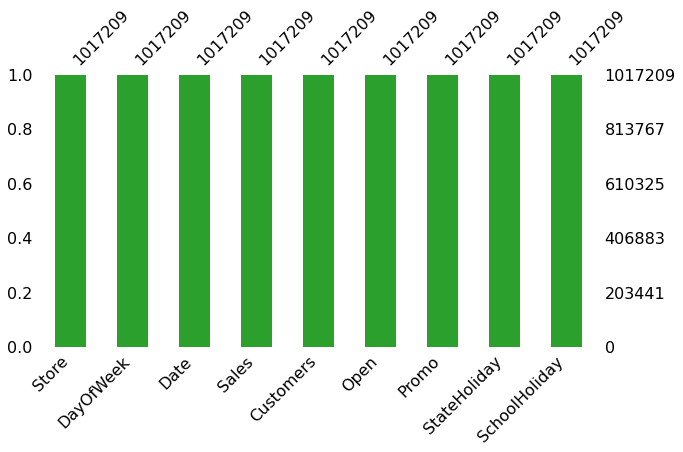

In [15]:
# Visualizing the missing values in Rossmann dataset
msno.bar(df_rossmann,figsize=(10,5), color="tab:green")

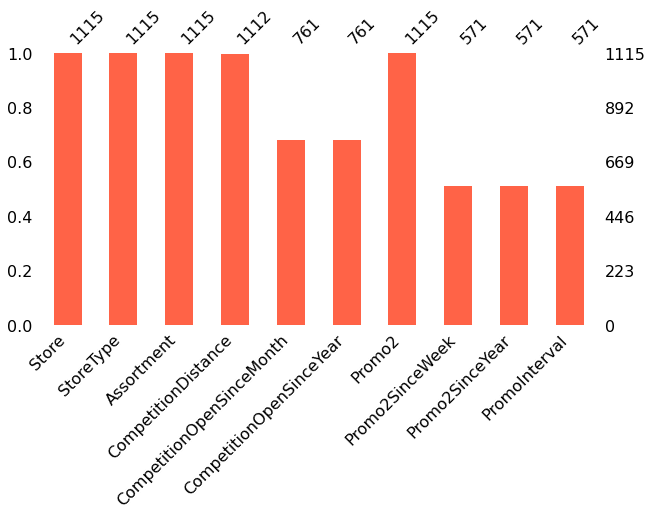

In [16]:
# Visualizing the missing values in Store dataset
msno.bar(df_store,figsize=(10,5),color="tomato")

### What did you know about your dataset?

Till now we get to know the following points about our dataset:

1.   Rossmann dataset does not contain any duplicated observations, null or numpy infinite values.
2.   Store dataset contains 50% null values in 3 of the features(Promo2SinceWeek, Promo2SinceYear, PromoInterval), 30% null values in 2 features (CompetitionSinceMonth, CompetitionSinceYear) and only 3 null values in (CompetitionDistance) feature.
3. Rossmann dataset contains 1017209 observations and Store dataset contains only 1115 observations which is not even 1% of Rossmann dataset so we have to be very careful while merging the datasets.




## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
print(f"Column names of Rossmann dataset is:\n{df_rossmann.columns.tolist()}")
print(f"Column names of Store dataset is:\n{df_store.columns.tolist()}")

Column names of Rossmann dataset is:
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
Column names of Store dataset is:
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [18]:
#Rossmann Dataset Describe
df_rossmann.describe(include="all")

Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday  
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06  
unique           NaN           NaN            5            NaN  
top              NaN           NaN            0            NaN  
freq             NaN           NaN       855087            NaN  
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01  
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00  
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00

In [19]:
# Store dataset describe
df_store.describe(include="all")

Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique         NaN         4          3                  NaN   
top            NaN         a          a                  NaN   
freq           NaN       602        593                  NaN   
mean     558.00000       NaN        NaN          5404.901079   
std      322.01708       NaN        NaN          7663.174720   
min        1.00000       NaN        NaN            20.000000   
25%      279.50000       NaN        NaN           717.500000   
50%      558.00000       NaN        NaN          2325.000000   
75%      836.50000       NaN        NaN          6882.500000   
max     1115.00000       NaN        NaN         75860.000000   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear       Promo2  \
count                  761.000000                761.000000  1115.000000   
unique                        NaN                       NaN          NaN   
top                           NaN                       NaN          NaN   
freq                          NaN                       NaN          NaN   
mean                     7.224704               2008.668857     0.512108   
std                      3.212348                  6.195983     0.500078   
min                      1.000000               1900.000000     0.000000   
25%                      4.000000               2006.000000     0.000000   
50%                      8.000000               2010.000000     1.000000   
75%                     10.000000               2013.000000     1.000000   
max                     12.000000               2015.000000     1.000000   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
count        571.000000       571.000000              571  
unique              NaN              NaN                3  
top                 NaN              NaN  Jan,Apr,Jul,Oct  
freq                NaN              NaN              335  
mean          23.595447      2011.763573              NaN  
std           14.141984         1.674935              NaN  
min            1.000000      2009.000000              NaN  
25%           13.000000      2011.000000              NaN  
50%           22.000000      2012.000000              NaN  
75%           37.000000      2013.000000              NaN  
max           50.000000      2015.000000              NaN

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
for i in df_rossmann.columns.tolist():
  print("The Unique Values of', i, 'are:", df_rossmann[i].unique())

The Unique Values of', i, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', i, 'are: [5 4 3 2 1 7 6]
The Unique Values of', i, 'are: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-0

In [21]:
# Check Unique Values for each variable.
for j in df_store.columns.tolist():
  print("The Unique Values of', j, 'are:", df_store[j].unique())

The Unique Values of', j, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', j, 'are: ['c' 'a' 'd' 'b']
The Unique Values of', j, 'are: ['a' 'c' 'b']
The Unique Values of', j, 'are: [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03
 1.181e+04 1.870e+03 4.

## 3. ***Data Wrangling***

####1. Null values treatment

 ##### a). Handling null values from **CompetitionDistance** feature.

In [22]:
# fetching the observations which contains null values in CompetitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

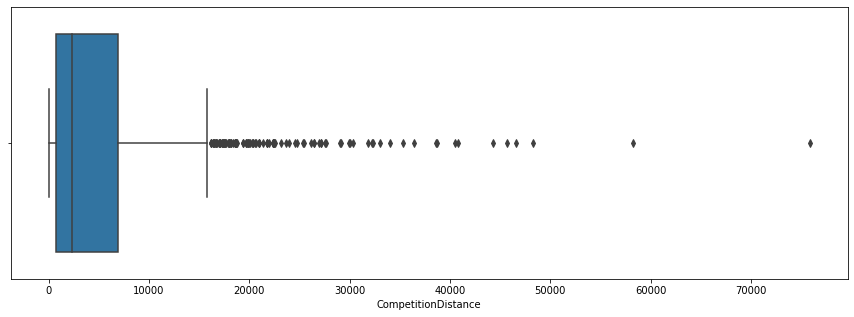

In [23]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= df_store["CompetitionDistance"])

Ummm... In order to fill the null values of CompetitionDistance we have 4 options:
1. Zero(0) >> Not effective as the corresponding CompetitionSinceMonth and CompetitionSinceYear should also have 0 and this is not possible.
2. Mean >> Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. Median >> To get good results replacing with median can be a better choice.
4. Mode >> Mode can also help to fill the null values in our case

Since, we have two options(Mode and Median) we are going with the median.

In [24]:
# filling null values
df_store["CompetitionDistance"].fillna(df_store["CompetitionDistance"].median(), inplace=True)

In [25]:
# rechecking if we have any further null values in CompetitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

Hurray!!  We do not have any further null values in CompetitionDistance feature.

##### b). Handling null values from **CompetitionOpenSinceMonth and CompetitionOpenSinceYear** feature.

In [26]:
# fetching the observations which contains null values in CompetitionDistance and CompetitionOpenSinceYear feature
df_store[df_store["CompetitionOpenSinceMonth"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

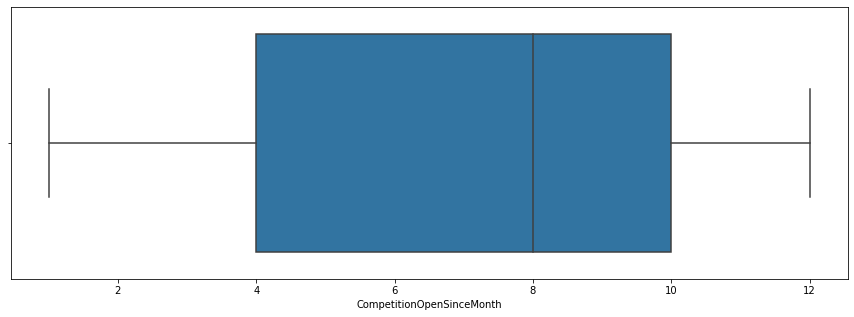

In [27]:
# plotting seaborn box plot to check the outliers in CompetitionDistance and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(df_store["CompetitionOpenSinceMonth"])

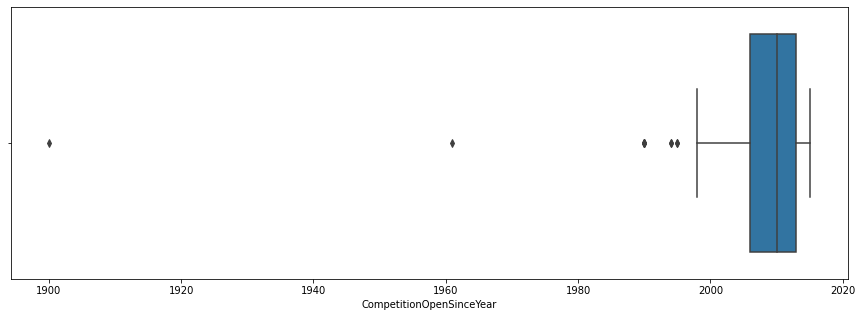

In [28]:
# plotting seaborn box plot to check the outliers in CompetitionDistance and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(df_store["CompetitionOpenSinceYear"])

In [29]:
# filling null values of CompetitionOpenSinceMonth
df_store["CompetitionOpenSinceMonth"].fillna(df_store["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

In [30]:
# filling null values of CompetitionOpenSinceYear
df_store["CompetitionOpenSinceYear"].fillna(df_store["CompetitionOpenSinceYear"].mode()[0], inplace=True)

In [31]:
# rechecking if we have any null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##### c). Handling null values from **Promo2SinceWeek, Promo2SinceYear and PromoInterval** feature.

Since, Promo2SinceWeek, Promo2SinceYear and PromoInterval can not contains outliers as  Promo2SinceWeek and Promo2SinceYear having specified range and PromoInterval is the categorical feature. So replacing null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval as 0 as the corrosponding store is not involve in promotion.

In [32]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0. 
df_store["Promo2SinceWeek"].fillna(0, inplace=True)
df_store["Promo2SinceYear"].fillna(0, inplace=True)
df_store["PromoInterval"].fillna(0, inplace=True)

In [33]:
# rechecking if our features contains more null values
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Congratulations we have achieved our first milestone by cleaning up all the null/missing values from both the datasets.

#### 2. Merging datasets

In [34]:
# checking shape of dataset using left join
df_left= pd.merge(df_rossmann, df_store, on="Store", how= "left")
print(df_left.shape)
print(f"Total number of null values obtained from left join: {df_left.isna().sum().sum()}")

# checking shape of dataset using right join
df_right= pd.merge(df_rossmann, df_store, on="Store", how= "right")
print(df_right.shape)
print(f"Total number of null values obtained from right join: {df_right.isna().sum().sum()}")


# checking shape of dataset using inner join
df_inner= pd.merge(df_rossmann, df_store, on="Store", how= "inner")
print(df_inner.shape)
print(f"Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}")

# checking shape of dataset using outer join
df_outer= pd.merge(df_rossmann, df_store, on="Store", how= "outer")
print(df_outer.shape)
print(f"Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}")

(1017209, 18)
Total number of null values obtained from left join: 0
(1017209, 18)
Total number of null values obtained from right join: 0
(1017209, 18)
Total number of null values obtained from inner join: 0
(1017209, 18)
Total number of null values obtained from outer join: 0


Since, we are obtaining the same shape and 0 null values from all the joins therefore we can use any of the join and it won't affact the results.

We are following the inner join for our further analysis.

In [35]:
#using inner join for our further analysis
df= pd.merge(df_rossmann, df_store, on="Store", how= "inner")
print(df.shape)

(1017209, 18)


In [36]:
# rechecking for the null values(if any) after merging
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [37]:
#checking info of our final merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#### 3. Typecasting

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [39]:
# changing dtype into required format from both the datasets
df["Date"]= pd.to_datetime(df["Date"],format="%Y/%m/%d")
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

### What all manipulations have you done and insights you found?

In data wrangling we have divided it into three sections:


1.   **Null values treatment**: In this section we have treated all the null values from both the datasets. We did the following replacements:


> a. Replaced null values of CompetitionDistance with MEDIAN.

> b. Replaced null values of CompetitionOpenSinceMonth and with MODE.

> c. Replaced null values of CompetitionOpenSinceYear and with MODE.

> d. Replaced null values of Promo2SinceWeek and with 0. 

> e. Replaced null values of Promo2SinceYear and with 0.

> f. Replaced null values of PromoInterval and with 0.


2.   **Merging datasets**: We don't want to compromise with quality and quantity of our dataset in order to get the best accuracy in ML model implementation. So, we were wondering to use the best join for the good results and we got to know with our R&D that every join is giving the same shape of our merged dataset with 0 null values (Since the nunique(Number of unique counts are same) is same of merging feature("Store")). That's why we have decided to go with the inner join.

3.   **Typecasting**: In typecasting section we have typecasted the following features in order to visualize it properly and can feed them as input of ML model:


> a.

> b.

> c.

> d.











## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

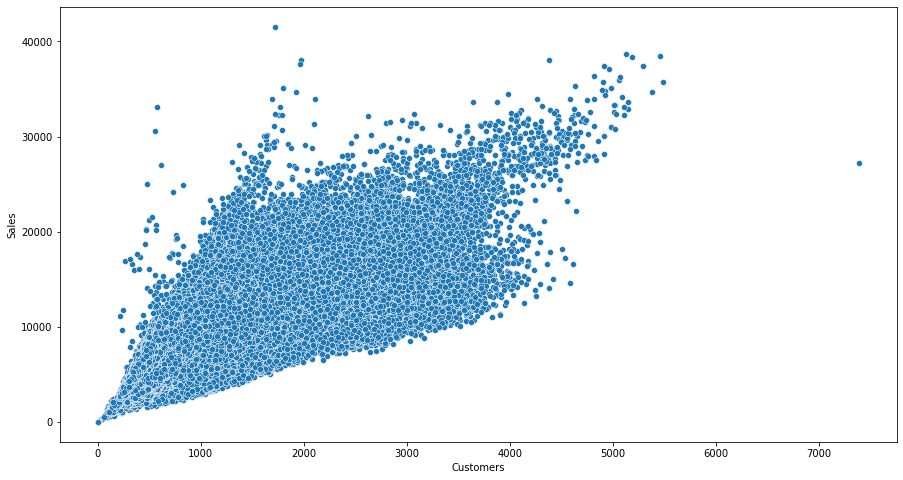

In [41]:
# Chart - 1 visualization code
plt.figure(figsize=(15,8))
sns.scatterplot(df["Customers"], df["Sales"], palette='colorblind')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

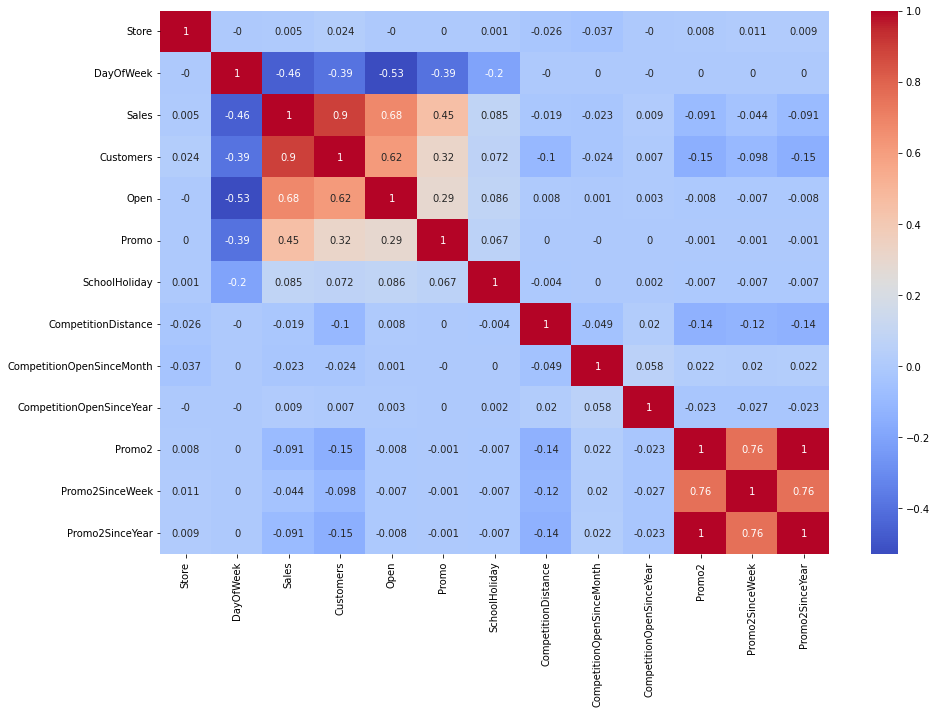

In [42]:
# Chart - 2 visualization code
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(),3), annot=True, cmap="coolwarm")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 1.0, 'Sales vs Promotion (0-No Promotion, 1-Promotion)')

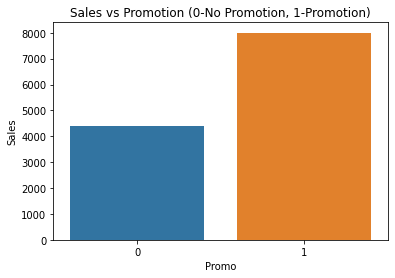

In [43]:
# Chart - 3 visualization code
ax= sns.barplot(x=df["Promo"], y=df["Sales"])
plt.title("Sales vs Promotion (0-No Promotion, 1-Promotion)")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

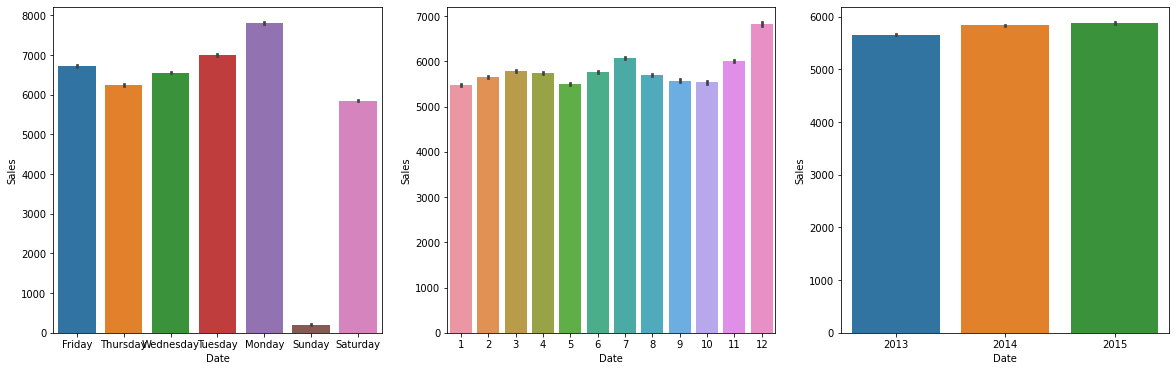

In [44]:
# Chart - 4 visualization code
plt.figure(figsize=(20,6))

#sales per date
plt.subplot(1,3,1)
sns.barplot(x=df["Date"].dt.day_name(), y=df["Sales"])

#sales per month
plt.subplot(1,3,2)
sns.barplot(x=df["Date"].dt.month, y=df["Sales"])

#sales per year
plt.subplot(1,3,3)
sns.barplot(x=df["Date"].dt.year, y=df["Sales"])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

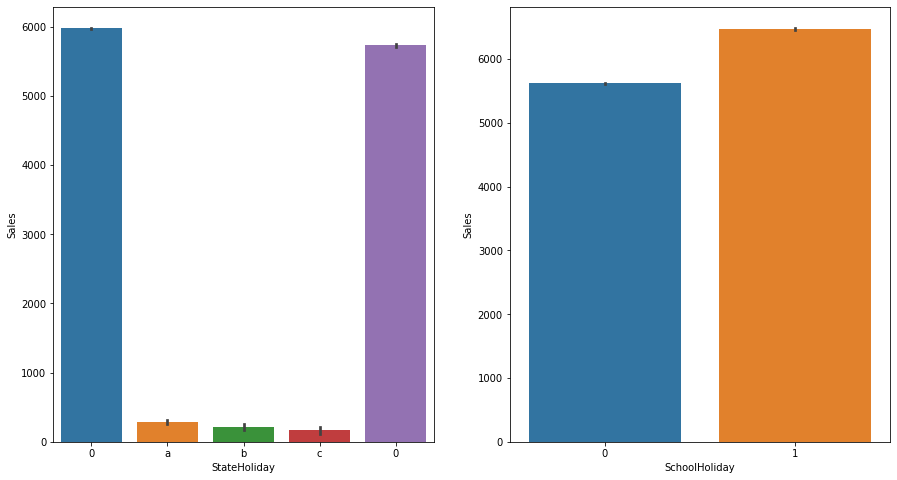

In [45]:
# Chart - 5 visualization code
# State Holiday vs Sales
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(df["StateHoliday"],df["Sales"])

# School Holiday vs Sales
plt.subplot(1,2,2)
sns.barplot(df["SchoolHoliday"],df["Sales"])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [46]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [47]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [48]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [49]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [50]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [51]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [52]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [53]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [54]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [55]:
# Pair Plot visualization code
# sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [57]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [58]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [59]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

We have replaced all the missing values in Data Wrangling section so we do not have any more missing/null/duplicad values in our dataset and our dataset is good to go.

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have checked the outliers and then replaced the null values of various columns with median and mode (clearly explained in the Data Wrangling section).

### 2. Handling Outliers

#### Univariate analysis of Outliers

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [61]:
# assigning continous variable features in new variables so that it makes sense while visulatizing through box plots
continous_value_feature= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]
print("Numeric_features: ",numeric_features)
print("Categorical_features: ",categorical_features)
print("Continous_value_feature: ",continous_value_feature)

Numeric_features:  ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
Categorical_features:  ['Date', 'StoreType', 'Assortment', 'PromoInterval']
Continous_value_feature:  ['DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']


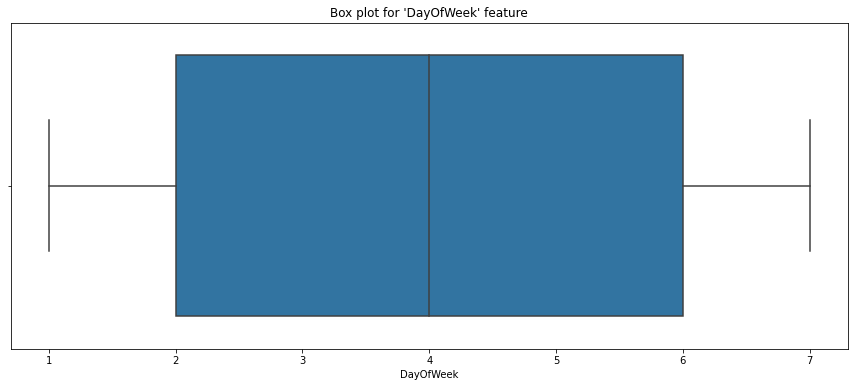

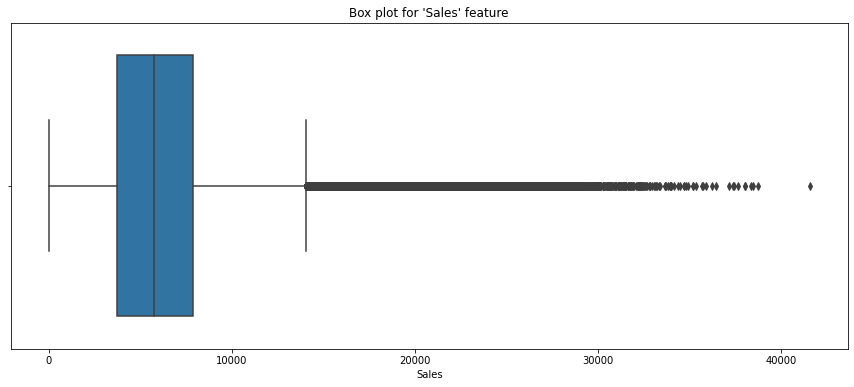

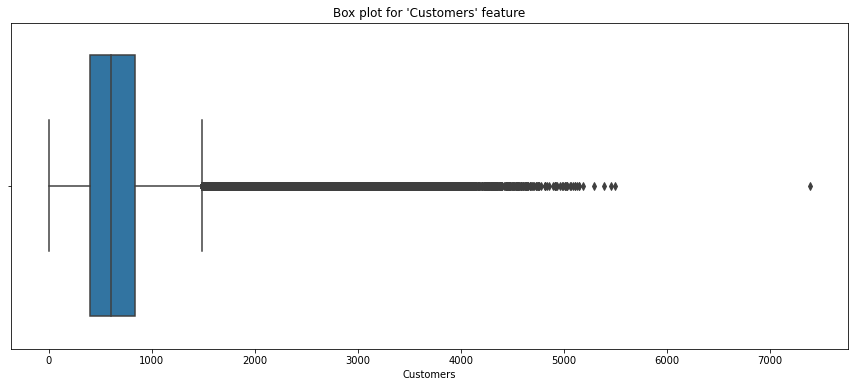

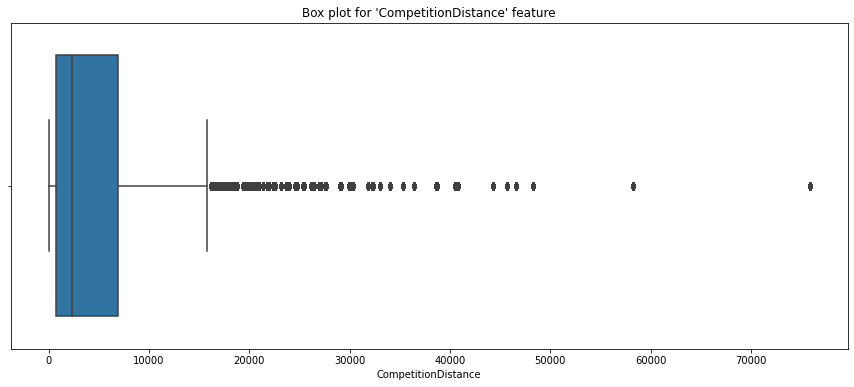

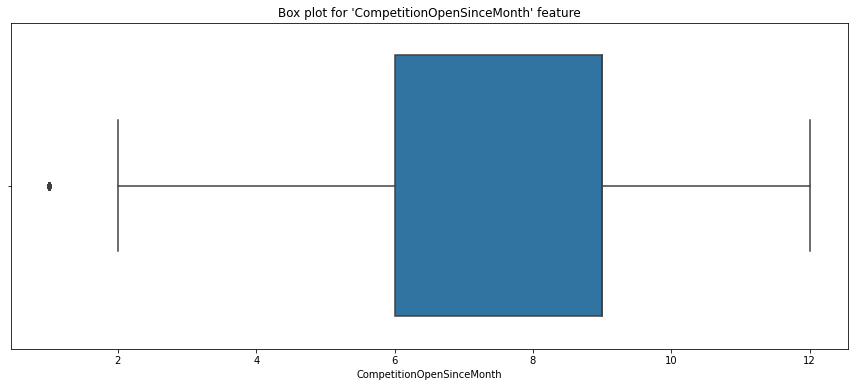

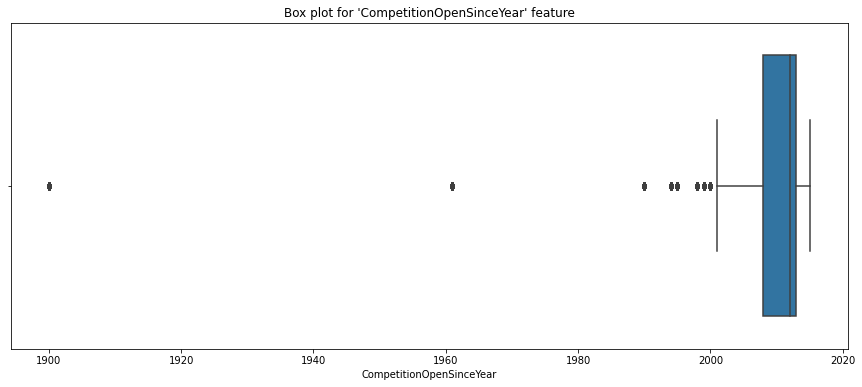

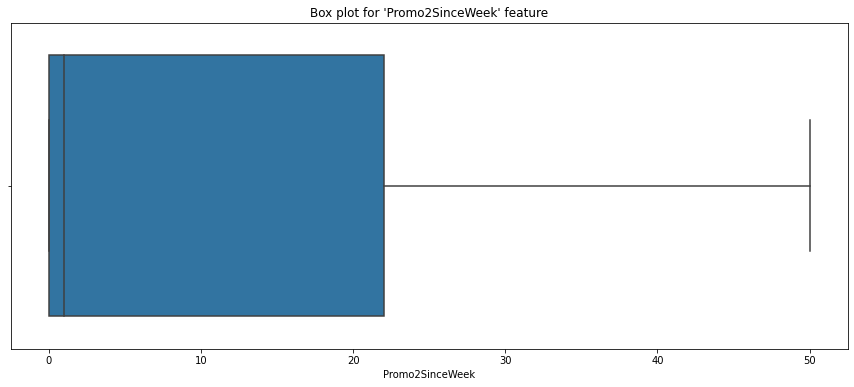

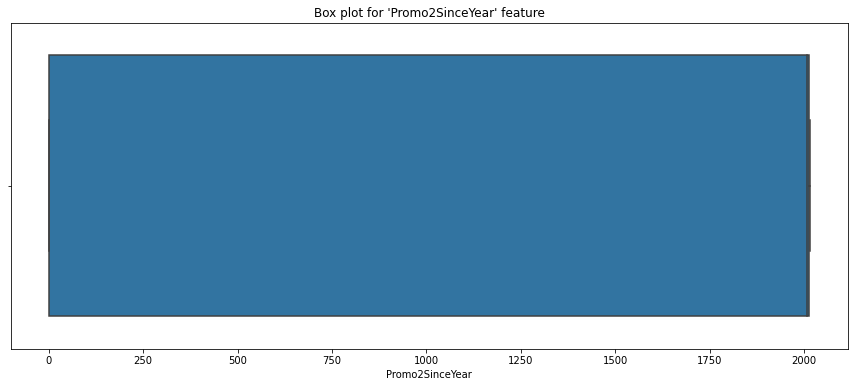

In [62]:
# Handling Outliers & Outlier treatments
for i in continous_value_feature:
  plt.figure(figsize=(15,6))
  sns.boxplot(df[i])
  plt.title(f"Box plot for '{i}' feature")
  plt.show()

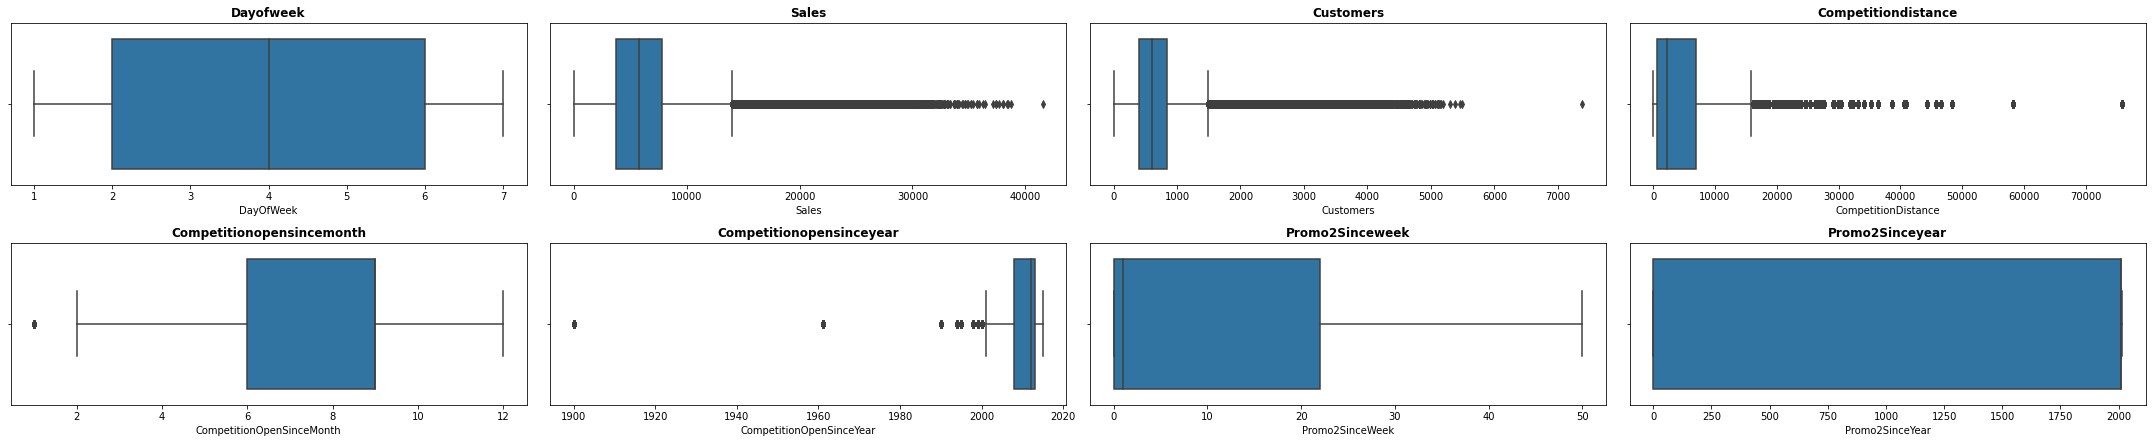

In [63]:
#all numeric
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

From the above box plots we can see clearly the features "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" contains several outliers and rest of the features are fine as they are categorical in nature.

Let's define a code to detect the number of outliers and percentage of outliers present in each of the feature in order to handle them accordingly.

In [64]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [65]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:4.0, q3:6.0
Lower bound: -4.0, Upper bound: 12.0, IQR: 4.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 26694
Total percentage of outlier is: 2.62 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 38095
Total percentage of outlier is: 3.75 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 99160
Total percentage of outlier is: 9.75 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 12452
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 27

We have outliers and its percentage in the given features:

1. "Sales" - 2.62%
2. "Customers" - 3.75%
3. "CompetitionDistance" - 9.75%
4. "CompetitionOpenSinceMonth" - 1.22%
5. "CompetitionOpenSinceYear" - 2.71%

Let's define one more function for the outlier treatment using IQR technique and pass the above values to get those values in the IQR.

In [66]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [67]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continous_value_feature:
  df[feature]= treat_outliers_iqr(df[feature])

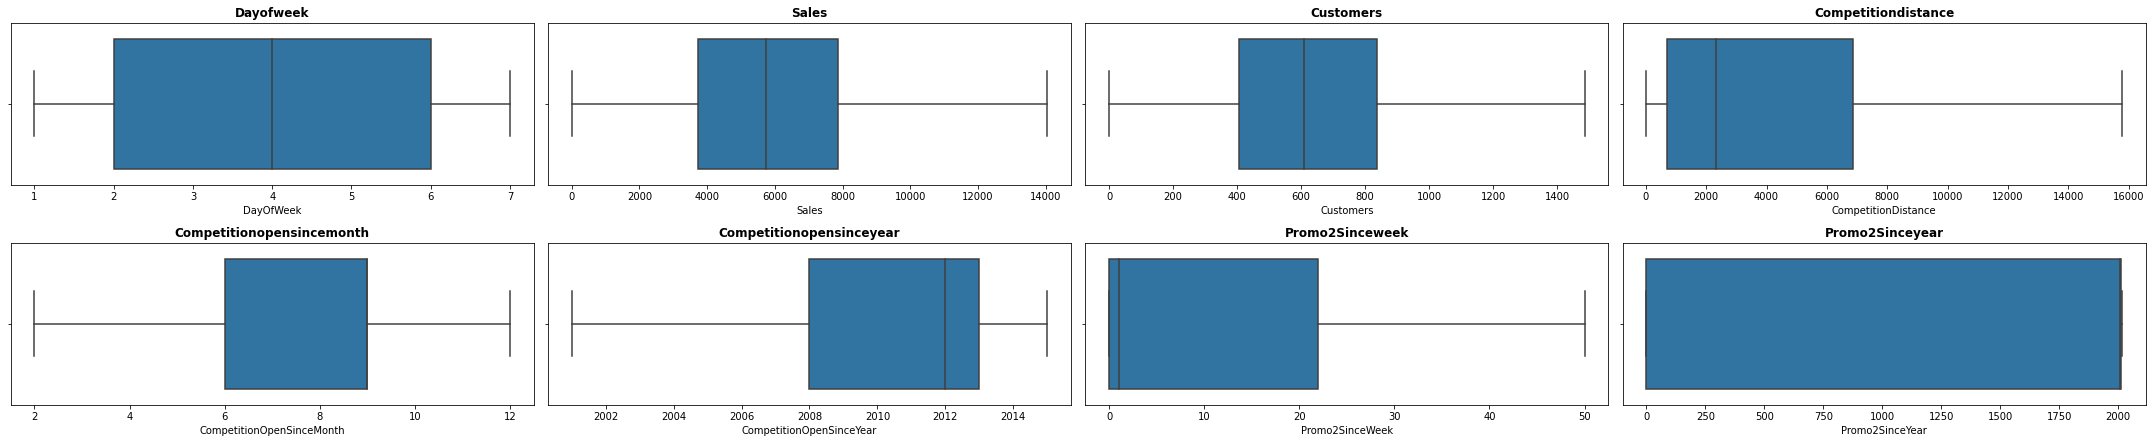

In [68]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [69]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:4.0, q3:6.0
Lower bound: -4.0, Upper bound: 12.0, IQR: 4.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 0
Total percentage of 

#### Bivariate analysis of Outliers

In [70]:
# Storing object datatype column in the new list
obj_dtype= ["StateHoliday", "Assortment", "StoreType", "PromoInterval"]

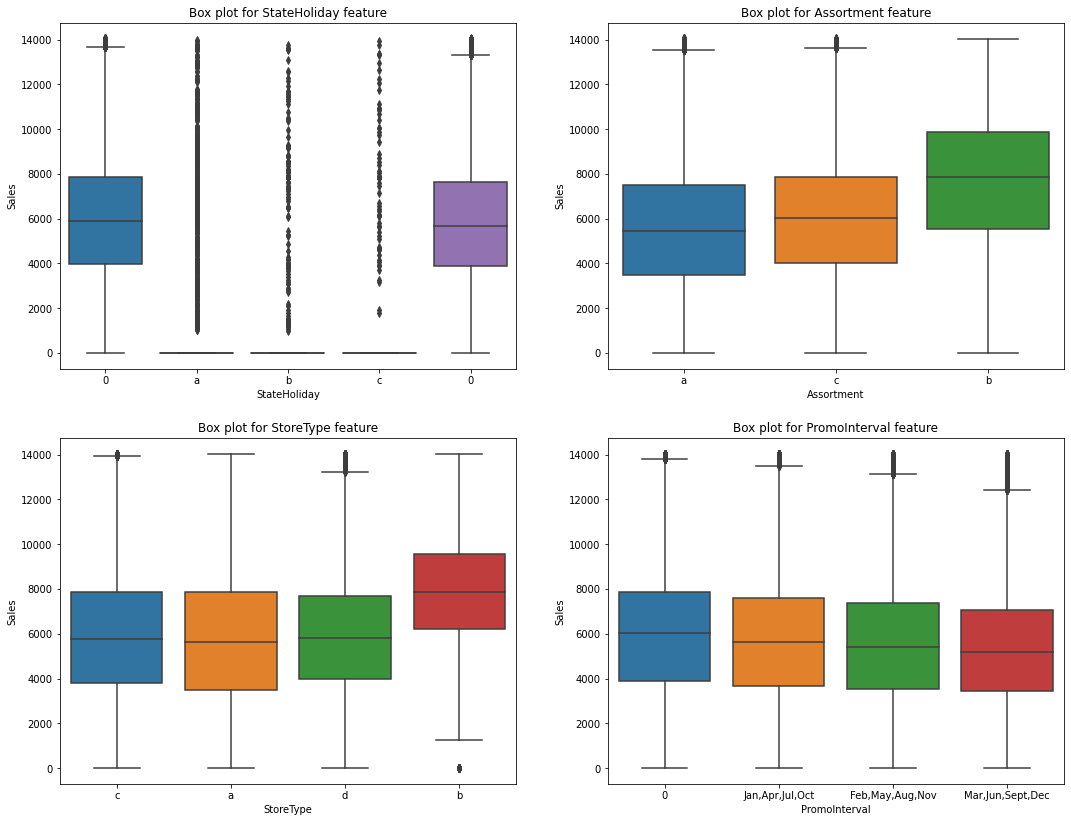

In [71]:
# Checking the outliers present in each category
plt.figure(figsize=(18,14))
for i,j in enumerate(obj_dtype):
  plt.subplot(2,2,i+1)
  sns.boxplot(x=df[j], y=df["Sales"])
  plt.title(f"Box plot for {j} feature")

In [72]:
obj_dtype

['StateHoliday', 'Assortment', 'StoreType', 'PromoInterval']

In [73]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the category of object dtype features
for feature in obj_dtype:
  print(f"Feature: {feature}")
  for num,cat in enumerate(df[feature].unique().tolist()):
    print(f"{num+1}: Category: {cat}")
    detect_outliers(df[df[feature]==cat]["Sales"])
    print("\n")

Feature: StateHoliday
1: Category: 0
q1:3982.0, q2:5878.0, q3:7856.0
Lower bound: -1829.0, Upper bound: 13667.0, IQR: 3874.0
Total number of outliers are: 3112
Total percentage of outlier is: 0.36 %


2: Category: a
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 694
Total percentage of outlier is: 3.43 %


3: Category: b
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 145
Total percentage of outlier is: 2.17 %


4: Category: c
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 71
Total percentage of outlier is: 1.73 %


5: Category: 0
q1:3874.0, q2:5674.0, q3:7650.25
Lower bound: -1790.375, Upper bound: 13314.625, IQR: 3776.25
Total number of outliers are: 773
Total percentage of outlier is: 0.59 %


Feature: Assortment
1: Category: a
q1:3492.0, q2:5463.0, q3:7514.0
Lower bound: -2541.0, Upper bound: 13547.0, IQR: 4022.0
Total number of out

Although we have some categorical outliers in the dataset but we will not treat them because we are going to implement ML model and algorithm can easily handle these outliers without information loss.

Hurray!!! We have successfully handled all the outliers without simply dropping them.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since, the outliers present in some of the continous features i.e "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear" having the percentage 2.62%, 3.75% ,9.75%, 1.22%, 2.71% respectively.

We have defined the two seperate funtions one is for "outlier detection" and the other is for "outlier treatment using IQR" and passed all the observations of continous features through it. We have successfully shifted out extreme left outliers(<25%) and extreme outliers(>75%) in the 25th and 75th quartile value.

### 3. Categorical Encoding

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

Clearly we have "StoreType", "Assortment", "PromoInterval" as "object". To feed them as an input of our Machine Learning algorithm, we need to use some encoding technique to make dtype of these column as "integer".

In [75]:
# creating the variable that contains list of "object" dtypes
obj= ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

In [76]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: ['0' 'a' 'b' 'c' 0]
Total number of unique values are: 5


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




From the above output we can see that the feature "StateHoliday" contains "0" as string and 0 as int at various observations. we have to label them as 0 can club together as they both are resembling same information.

In [77]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

In [78]:
# rechecking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: [0 1]
Total number of unique values are: 2


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




Great !!! Our data is ready for the ENCODING.

Since we have several encoding techniques but the major ones are:
1. Ordinal encoding: Used when the features are ordinal in nature and have some rank between them.
2. Nominal encoding: Used when the features have equal weightage and are nominal in nature.

As our all the categorical columns are nominal in nature(do not have any rank or order) so will use One-Hot Encoding (Type of Nominal encoding) in our senario:

In [79]:
#Lets create a copy of dataframe to avoid blunders with our original dataframe
df_new=df.copy() 

We can use the above code to create binary dummy variable for ONE-HOT ENCODING for each of the feature but we will face the issue of "multicollinearity" or "dummy variable trap" as the information given by the one feature can be explained by the other features and this results in the high "VIF". So it better to drop the redundant feature (one category among all other category) here only.

We can do this easily by passing the argument "drop_first = True" in get_dummies without doing it manually, thanks to python code development team to make our tasks easier.

In [80]:
# Encode your categorical columns by dropping the first category
df_new= pd.get_dummies(df, dtype=int, drop_first=True)

In [81]:
# code to see all the features
pd.set_option('display.max_columns', None)

In [82]:
# Let's see first five observations of our dataset
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      1          4 2015-07-30   5020        546     1      1             0   
2      1          3 2015-07-29   4782        523     1      1             0   
3      1          2 2015-07-28   5011        560     1      1             0   
4      1          1 2015-07-27   6102        612     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                 1270                          9   
2              1                 1270                          9   
3              1                 1270                          9   
4              1                 1270                          9   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2008       0                0                0   
2                      2008       0                0                0   
3                      2008       0                0                0   
4                      2008       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [83]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  int64         
 10  CompetitionOpenSinceMonth       1017209 no

#### What all categorical encoding techniques have you used & why did you use those techniques?

a. We have used one-hot encoding technique to change our categorical features of object type into int type by creating their dummies so that it becomes compatible to feed it into various ML algorithms in future.

b. Since, we have 3 to 4 unique orderless categories in all the categorical features (which is less in number). So, it is good to use Nominal encoding technique then ordinal.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)
##### We don't have textual data in any of the feature so it is not needed for our project

#### 1. Expand Contraction

In [84]:
# Expand Contraction
## We don't have textual data in any of the feature so it is not needed for our project

#### 2. Lower Casing

In [85]:
# Lower Casing
## We don't have textual data in any of the feature so it is not needed for our project

#### 3. Removing Punctuations

In [86]:
# Remove Punctuations
## We don't have textual data in any of the feature so it is not needed for our project

#### 4. Removing URLs & Removing words and digits contain digits.

In [87]:
# Remove URLs & Remove words and digits contain digits
## We don't have textual data in any of the feature so it is not needed for our project

#### 5. Removing Stopwords & Removing White spaces

In [88]:
# Remove Stopwords
## We don't have textual data in any of the feature so it is not needed for our project

In [89]:
# Remove White spaces
## We don't have textual data in any of the feature so it is not needed for our project

#### 6. Rephrase Text

In [90]:
# Rephrase Text
## We don't have textual data in any of the feature so it is not needed for our project

#### 7. Tokenization

In [91]:
# Tokenization
## We don't have textual data in any of the feature so it is not needed for our project

#### 8. Text Normalization

In [92]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
## We don't have textual data in any of the feature so it is not needed for our project

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [93]:
# POS Taging
## We don't have textual data in any of the feature so it is not needed for our project

#### 10. Text Vectorization

In [94]:
# Vectorizing Text
## We don't have textual data in any of the feature so it is not needed for our project

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [95]:
# Manipulate Features to minimize feature correlation and create new 
# Checking the first fir=ve observation of the dataset we have to deal with.
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      1          4 2015-07-30   5020        546     1      1             0   
2      1          3 2015-07-29   4782        523     1      1             0   
3      1          2 2015-07-28   5011        560     1      1             0   
4      1          1 2015-07-27   6102        612     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                 1270                          9   
2              1                 1270                          9   
3              1                 1270                          9   
4              1                 1270                          9   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2008       0                0                0   
2                      2008       0                0                0   
3                      2008       0                0                0   
4                      2008       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [96]:
# Extracting date, month and year from Date feature
df_new["Day"]= df_new["Date"].dt.day
df_new["Month"]= df_new["Date"].dt.month
df_new["Year"]= df_new["Date"].dt.year
df_new["Week"]= df_new["Date"].dt.week

In [97]:
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      1          4 2015-07-30   5020        546     1      1             0   
2      1          3 2015-07-29   4782        523     1      1             0   
3      1          2 2015-07-28   5011        560     1      1             0   
4      1          1 2015-07-27   6102        612     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                 1270                          9   
2              1                 1270                          9   
3              1                 1270                          9   
4              1                 1270                          9   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2008       0                0                0   
2                      2008       0                0                0   
3                      2008       0                0                0   
4                      2008       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  Day  Month  Year  Week  
0                               0   31      7  2015    31  
1                               0   30      7  2015    31  
2                               0   29      7  2015    31  
3                               0   28      7  2015    31  
4                               0   27      7  2015    31

In [98]:
# deriving 2 new features:
# 1. "CompetitionDuration -> Duration from which two stores are competiting"
# 2. "PromoDuration -> Duration from which the store is not involved in any promotion"
##    Final values are in Months.
df_new["CompetitionDuration"]= (df_new["Year"]-df_new["CompetitionOpenSinceYear"])*12 + (df_new["Month"]-df_new["CompetitionOpenSinceMonth"])
df_new["CompetitionDuration"] = df_new["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

# Creating PromoDuration feature
df_new["PromoDuration"]= (df_new["Year"]-df_new["Promo2SinceYear"])*12 + (df_new["Week"]-df_new["Promo2SinceWeek"])*7/30.5
df_new["PromoDuration"] = df_new["PromoDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0) * df["Promo2"]

In [99]:
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      1          4 2015-07-30   5020        546     1      1             0   
2      1          3 2015-07-29   4782        523     1      1             0   
3      1          2 2015-07-28   5011        560     1      1             0   
4      1          1 2015-07-27   6102        612     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                 1270                          9   
2              1                 1270                          9   
3              1                 1270                          9   
4              1                 1270                          9   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2008       0                0                0   
2                      2008       0                0                0   
3                      2008       0                0                0   
4                      2008       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  Day  Month  Year  Week  \
0                               0   31      7  2015    31   
1                               0   30      7  2015    31   
2                               0   29      7  2015    31   
3                               0   28      7  2015    31   
4                               0   27      7  2015    31   

   CompetitionDuration  PromoDuration  
0                   82              0  
1                   82              0  
2                   82              0  
3                   82              0  
4                   82              0

We have noticed that some of the observations in "Open" are 0 that means store are closed. This maybe due to store refurbishment. So there is very high possibility that our model create biasness towards zero sales(since store is closed there won't be any sale). We have mutually decided to drop those observations where store is closed so that we can tackle the real world senario without any biasness.

In [100]:
# Dropping the observations where the stores are closed and Sales are 0.
df_new = df_new.drop(df_new[((df_new.Open == 0) | (df_new.Sales == 0))].index)

Now we have the observations where "Open"=1 OR "Store is open". Its wont show any corelation with any other feature. So, its better to drop that feature here only.

In [101]:
# Dropping "Open" from our dataset
df_new.drop(columns=["Open"], inplace=True)

#### 2. Feature Selection

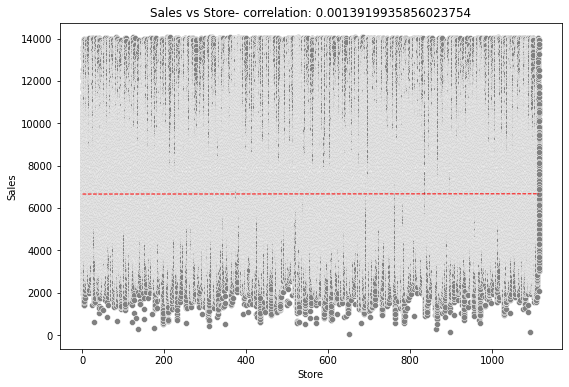

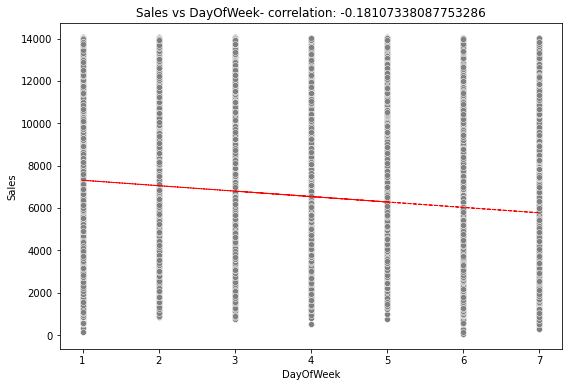

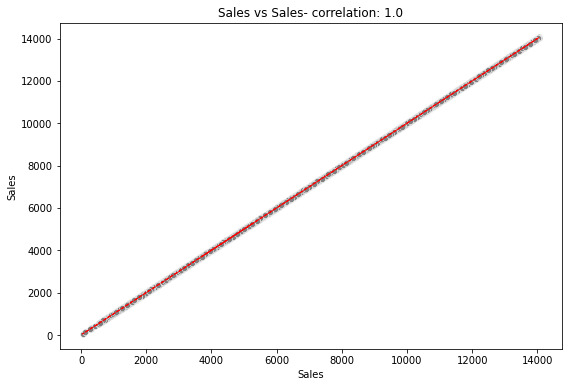

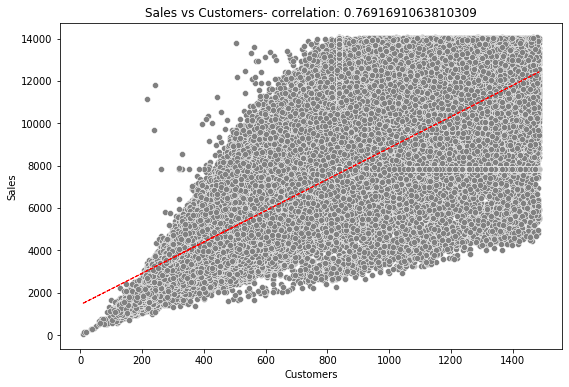

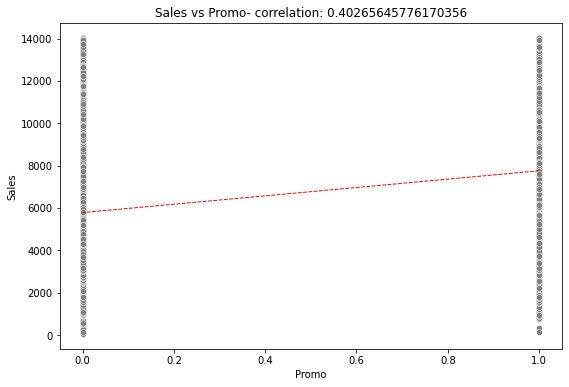

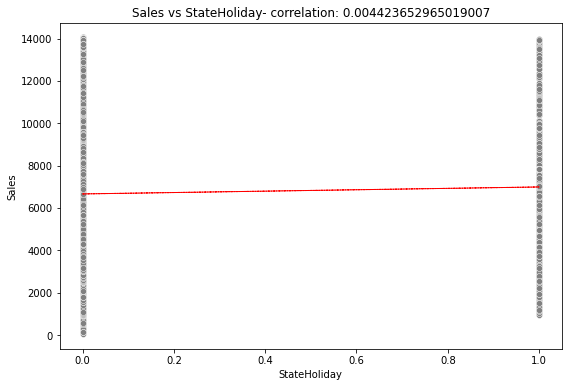

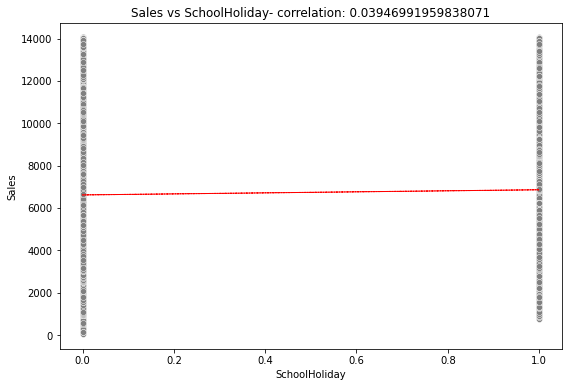

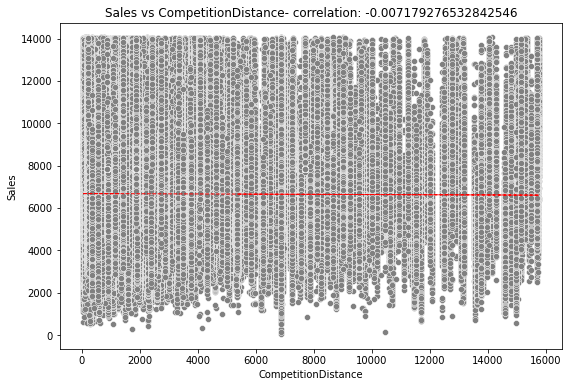

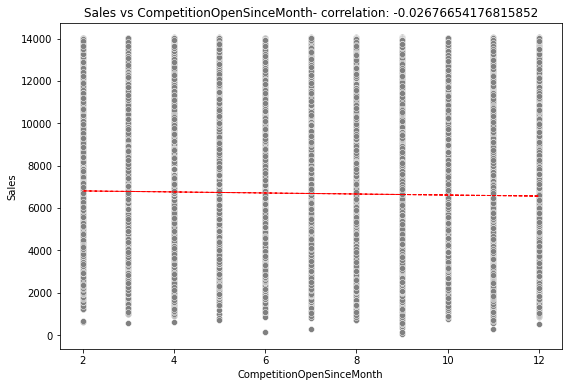

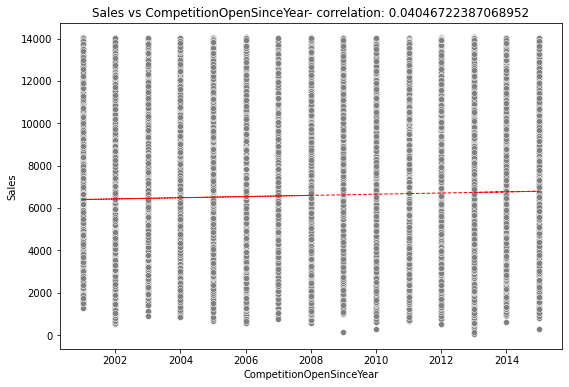

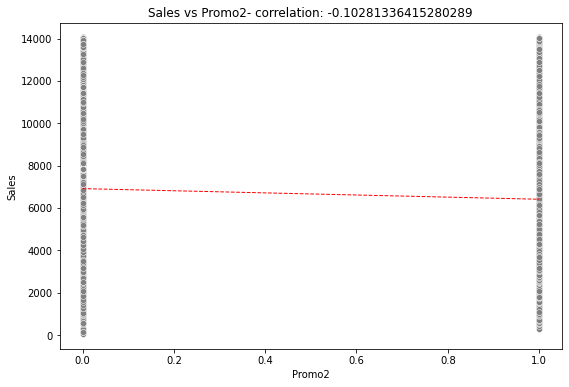

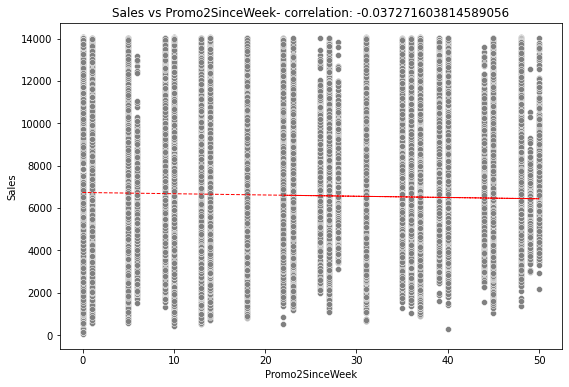

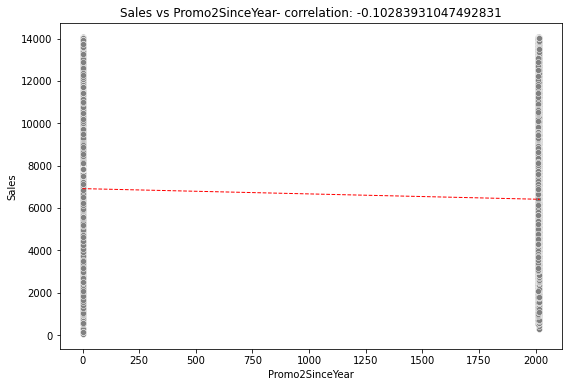

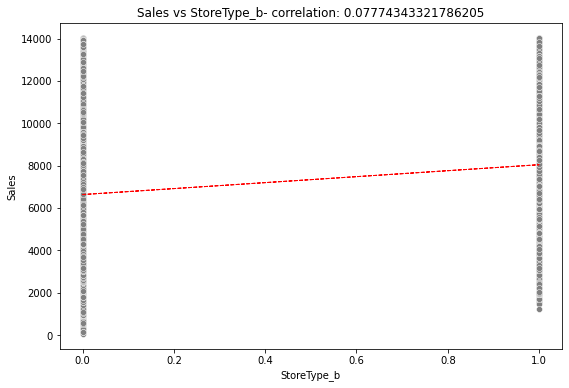

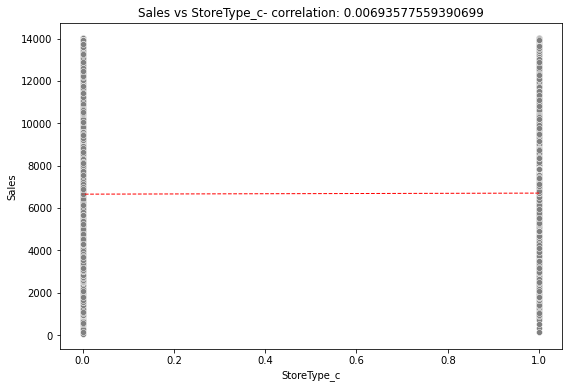

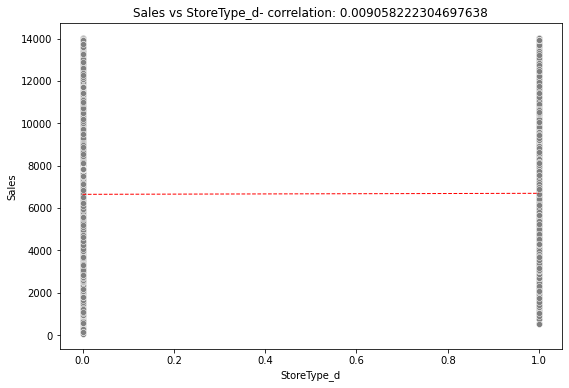

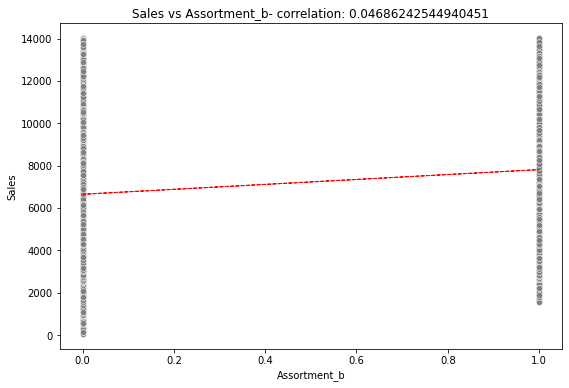

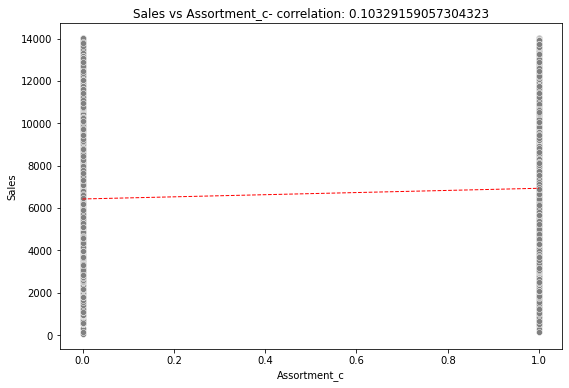

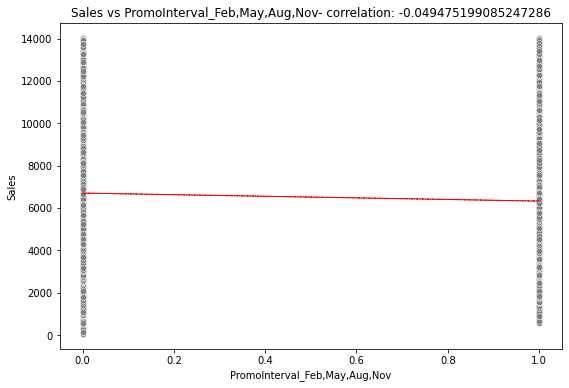

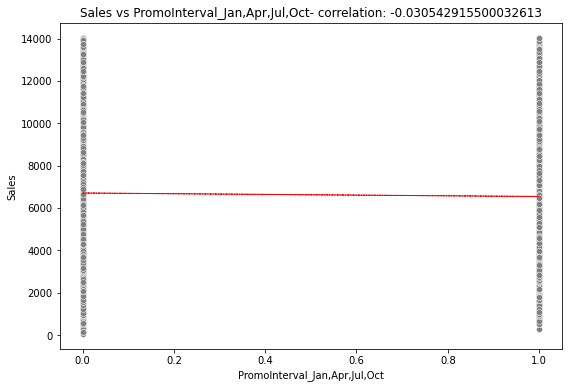

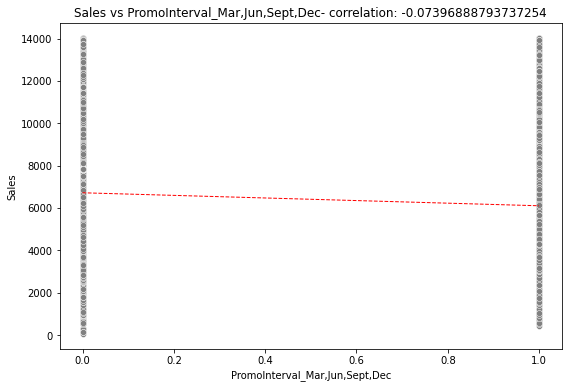

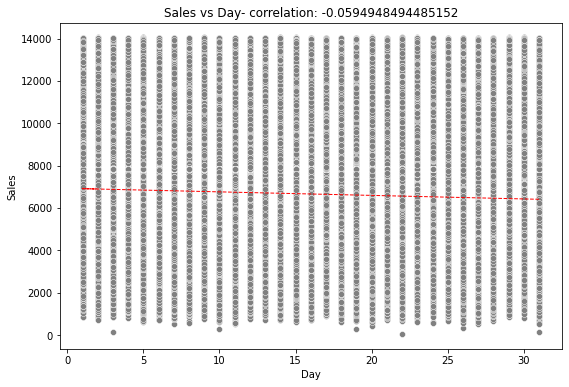

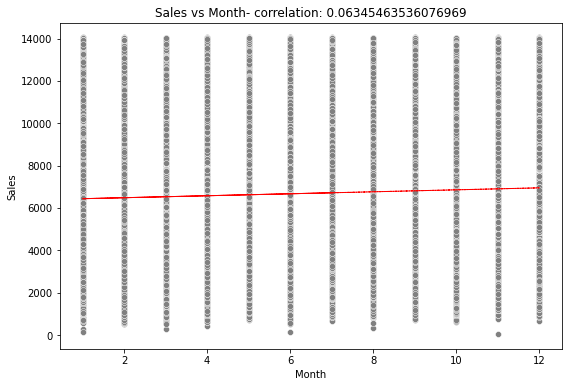

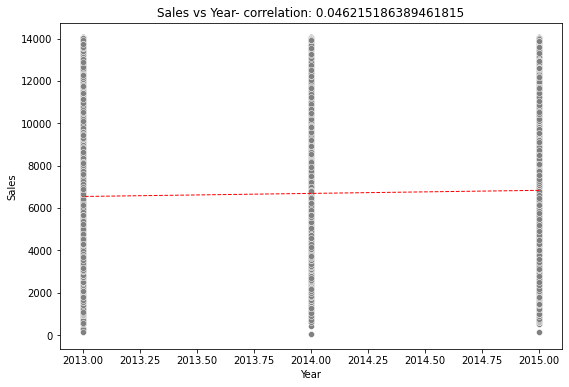

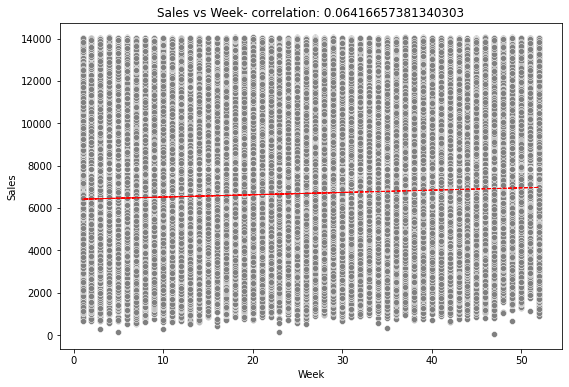

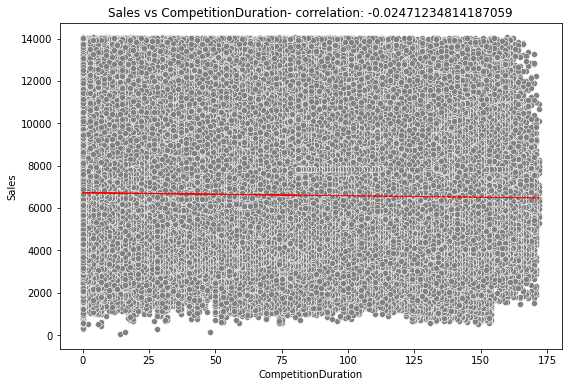

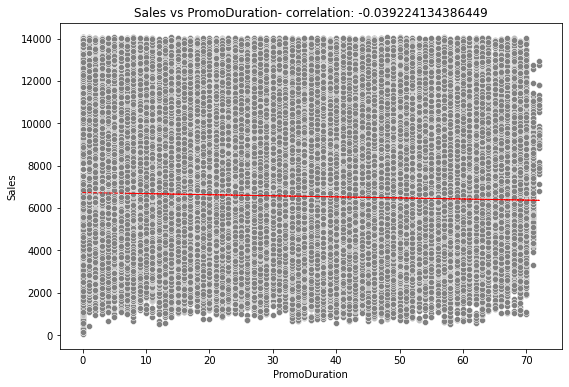

In [102]:
# Let's see how sales and other features are related
for col in df_new.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_new[col]
    label = df_new['Sales']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_new[col], df_new['Sales'], 1)
    y_hat = np.poly1d(z)(df_new[col])
    plt.plot(df_new[col], y_hat, "r--", lw=1)
    plt.show()

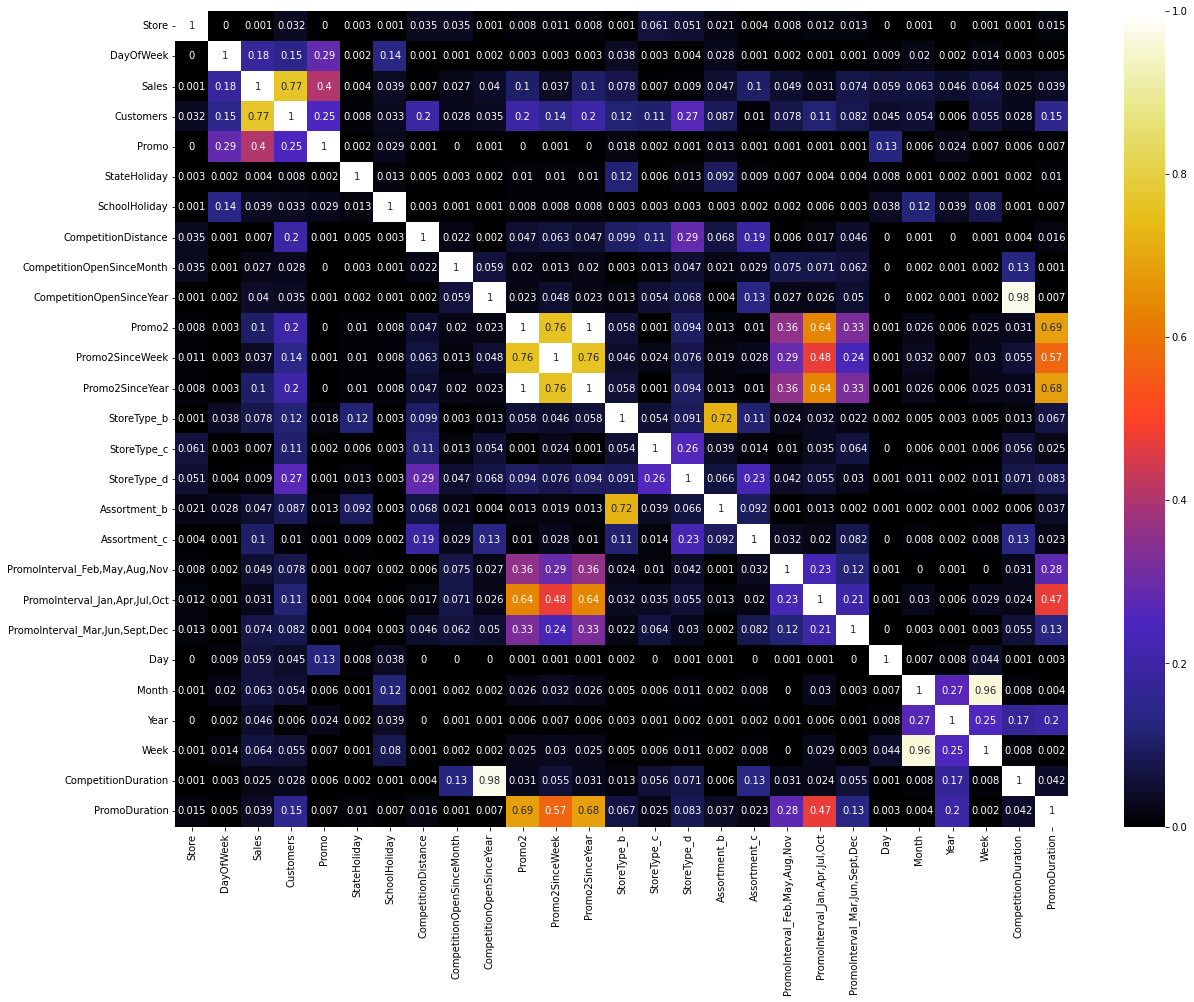

In [103]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(df_new.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

In [104]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculating VIF(Variance Inflation Factor) by excluding:
1. "Sales" -> As it is target variable
2. "Store" -> As it is StoreID and not giving any information

We have extracted the information of "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year", "Week" from our derived features "CompetitionDuration" and "PromoDuration" and have 0 correlation from "Sales". So we can exclude them too.


In [105]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear","Month", "Year", "Week"]]])

variables       VIF
0                        DayOfWeek  4.207212
1                        Customers  6.244939
2                            Promo  2.065450
3                     StateHoliday  1.015326
4                    SchoolHoliday  1.247044
5              CompetitionDistance  2.187080
6                           Promo2       inf
7                      StoreType_b  2.192722
8                      StoreType_c  1.267965
9                      StoreType_d  1.776592
10                    Assortment_b  2.122486
11                    Assortment_c  2.082342
12   PromoInterval_Feb,May,Aug,Nov       inf
13   PromoInterval_Jan,Apr,Jul,Oct       inf
14  PromoInterval_Mar,Jun,Sept,Dec       inf
15                             Day  3.774829
16             CompetitionDuration  1.844985
17                   PromoDuration  2.857299

Let's exclude "PromoInterval_Jan,Apr,Jul,Oct" as well. As we are getting the exact information from the "Promo2", "PromoInterval_Feb,May,Aug,Nov", "PromoInterval_Mar,Jun,Sept,Dec" features and has least corelation with "Sales".

In [106]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct"]]])

variables       VIF
0                        DayOfWeek  4.207212
1                        Customers  6.244939
2                            Promo  2.065450
3                     StateHoliday  1.015326
4                    SchoolHoliday  1.247044
5              CompetitionDistance  2.187080
6                           Promo2  4.580027
7                      StoreType_b  2.192722
8                      StoreType_c  1.267965
9                      StoreType_d  1.776592
10                    Assortment_b  2.122486
11                    Assortment_c  2.082342
12   PromoInterval_Feb,May,Aug,Nov  1.407490
13  PromoInterval_Mar,Jun,Sept,Dec  1.374452
14                             Day  3.774829
15             CompetitionDuration  1.844985
16                   PromoDuration  2.857299

Since "Assortment_b" and "Store_type_b" are also showing high corelation i.e 0.72 so we are gaining same information from both the features so its better to exclude the feature "Assortment_b" which is having less corelation with Sales(0.047). 

In [107]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct","Assortment_b"]]])

variables       VIF
0                        DayOfWeek  4.206834
1                        Customers  6.244747
2                            Promo  2.065352
3                     StateHoliday  1.015180
4                    SchoolHoliday  1.247031
5              CompetitionDistance  2.186880
6                           Promo2  4.575867
7                      StoreType_b  1.077882
8                      StoreType_c  1.267963
9                      StoreType_d  1.776586
10                    Assortment_c  2.081324
11   PromoInterval_Feb,May,Aug,Nov  1.407282
12  PromoInterval_Mar,Jun,Sept,Dec  1.374283
13                             Day  3.774645
14             CompetitionDuration  1.844978
15                   PromoDuration  2.856606

Now it is clear from heatmap that the information we are getting from  "PromoDuration" is same as from "Promo2". Also "PromoDuration" has having least corelation with "Sales".So, its good to excluding "PromoDuration".

In [108]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month","Week", "Year", "PromoInterval_Jan,Apr,Jul,Oct","Assortment_b","PromoDuration"]]])

variables       VIF
0                        DayOfWeek  4.205970
1                        Customers  6.239018
2                            Promo  2.065252
3                     StateHoliday  1.015180
4                    SchoolHoliday  1.246997
5              CompetitionDistance  2.180243
6                           Promo2  2.632483
7                      StoreType_b  1.076987
8                      StoreType_c  1.264516
9                      StoreType_d  1.775513
10                    Assortment_c  2.077269
11   PromoInterval_Feb,May,Aug,Nov  1.407065
12  PromoInterval_Mar,Jun,Sept,Dec  1.353186
13                             Day  3.774549
14             CompetitionDuration  1.835972

Great !!! We are getting very good VIF's (Less then 10). Now let's move forward and store the extremely important features in a new dataframe.

Let's make our final dataframe

In [109]:
# New Dataframe which will be our final dataframe
final_df = df_new[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration","Sales"]]

In [110]:
# Checking our final dataframe
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   DayOfWeek                       844338 non-null  int64
 1   Customers                       844338 non-null  int64
 2   Promo                           844338 non-null  int64
 3   StateHoliday                    844338 non-null  int64
 4   SchoolHoliday                   844338 non-null  int64
 5   CompetitionDistance             844338 non-null  int64
 6   Promo2                          844338 non-null  int64
 7   StoreType_b                     844338 non-null  int64
 8   StoreType_c                     844338 non-null  int64
 9   StoreType_d                     844338 non-null  int64
 10  Assortment_c                    844338 non-null  int64
 11  PromoInterval_Feb,May,Aug,Nov   844338 non-null  int64
 12  PromoInterval_Mar,Jun,Sept,Dec  844338 non-

##### What all feature selection methods have you used  and why?

We have ploted the seaborn's scatterplot and seaborn's heatmap to see the relationship of each of the feature with target variable and observed the following corelations:
1. **Positive Corelation**- Sales, Customers, Open, Promo, SchoolHoliday, CompetitionOpenSinceYear, Assortment_b, Assortment_c, Month, Year, Week, PromoDuration.
2. **Negative Corelation**- DayOfWeek, StateHoliday, ComptitionDistance, CompetitionOpenSinceMonth, Promo2, Promo2SinceWeek,Promo2SinceYear, 'PromoInterval_Feb,May,Aug,Nov, 'PromoInterval_Jan,Apr,Jul,Oct, PromoInterval_Mar,Jun,Sept,Dec, Day, CompetitionDuration.
3. **No Corelation**- Store, StoreType_c, StoreType_d

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Before Applying Transformation


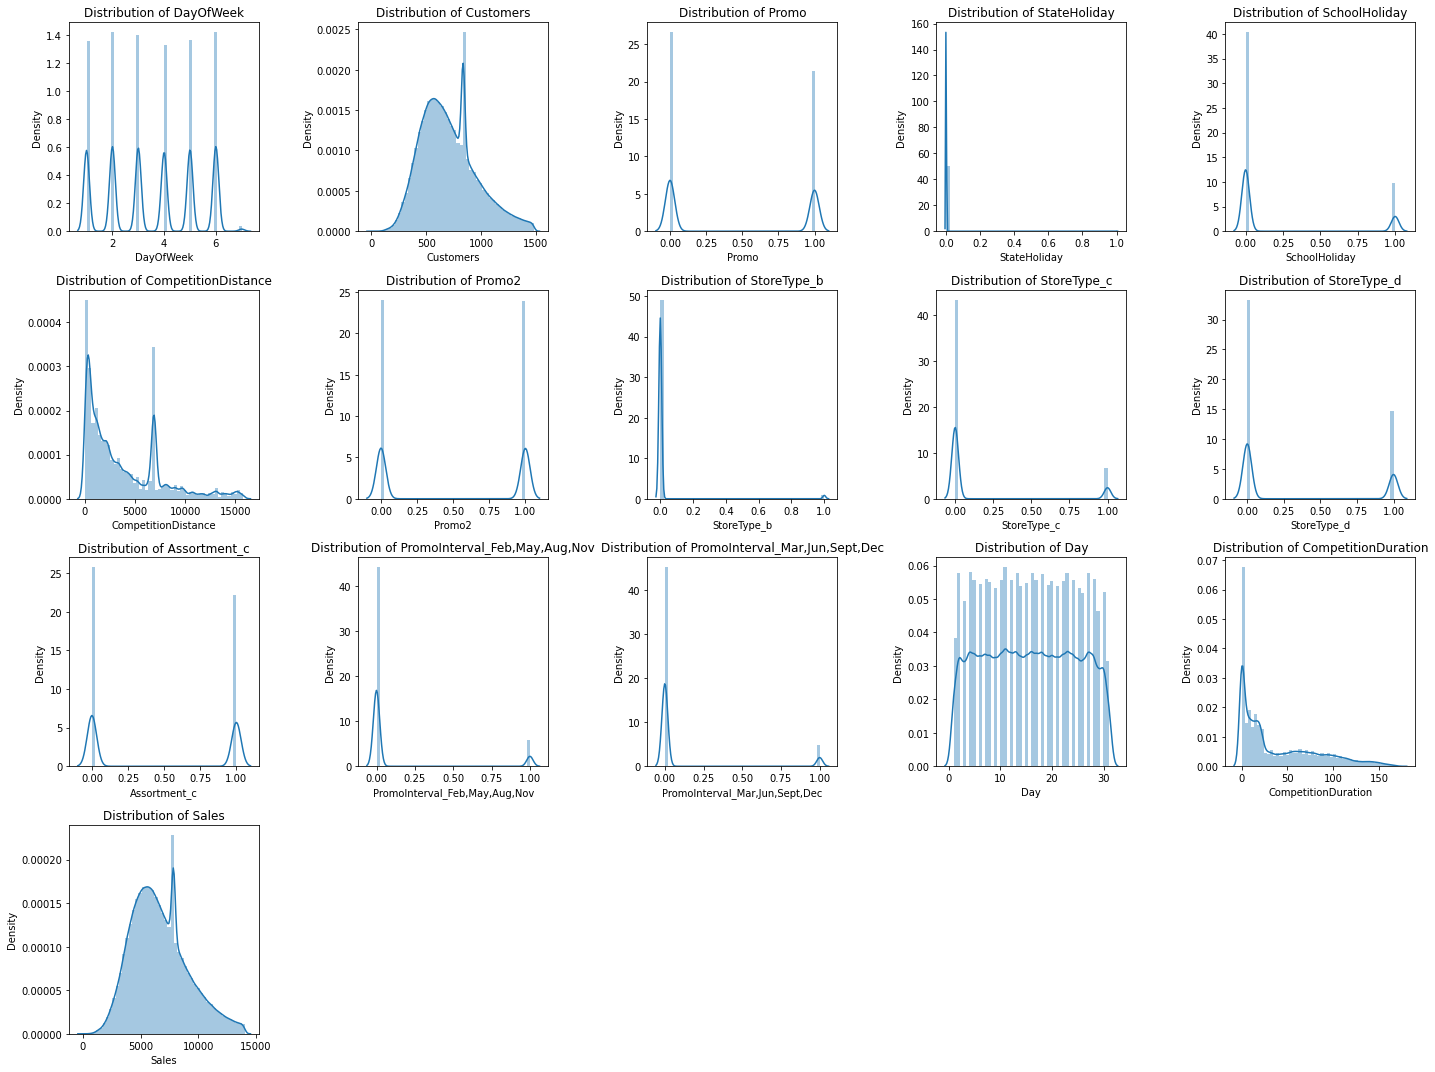

In [111]:
# Checking the distribution of each variable of our final dataframe
plt.figure(figsize=(20,15))
print("Before Applying Transformation")
for n,col in enumerate(final_df.columns):
  plt.subplot(4,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [112]:
# checking which of the variables are continous in nature
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

The number of unique counts in feature DayOfWeek is: 7
The number of unique counts in feature Customers is: 1421
The number of unique counts in feature Promo is: 2
The number of unique counts in feature StateHoliday is: 2
The number of unique counts in feature SchoolHoliday is: 2
The number of unique counts in feature CompetitionDistance is: 555
The number of unique counts in feature Promo2 is: 2
The number of unique counts in feature StoreType_b is: 2
The number of unique counts in feature StoreType_c is: 2
The number of unique counts in feature StoreType_d is: 2
The number of unique counts in feature Assortment_c is: 2
The number of unique counts in feature PromoInterval_Feb,May,Aug,Nov is: 2
The number of unique counts in feature PromoInterval_Mar,Jun,Sept,Dec is: 2
The number of unique counts in feature Day is: 31
The number of unique counts in feature CompetitionDuration is: 173
The number of unique counts in feature Sales is: 13193


In [113]:
# Storing the continous variables(number of unique counts >40) in a separate list and treating them in order to make gaussian distribution
cont_variables= ["Sales", "Customers", "CompetitionDistance", "CompetitionDuration"]

Before Applying Transformation


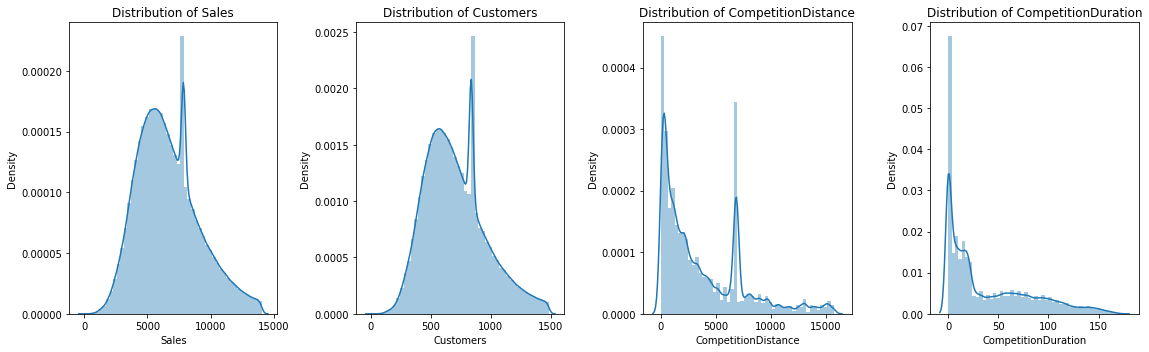

In [114]:
# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [115]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


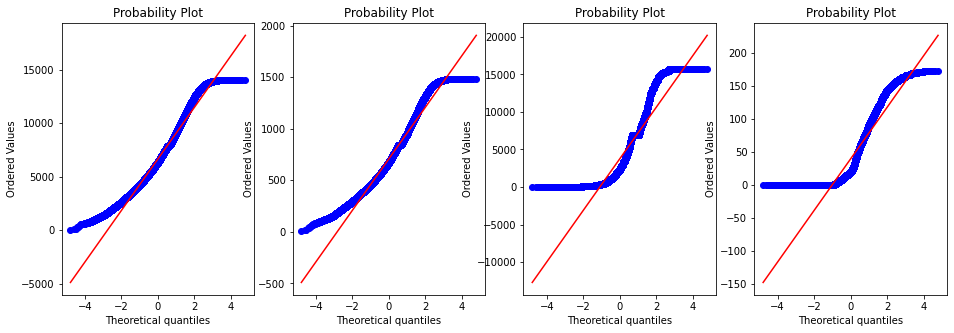

In [116]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)
plt.show()

In [117]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()
test_df5=final_df.copy()

Logarithmic Transformation

After Applying Transformation


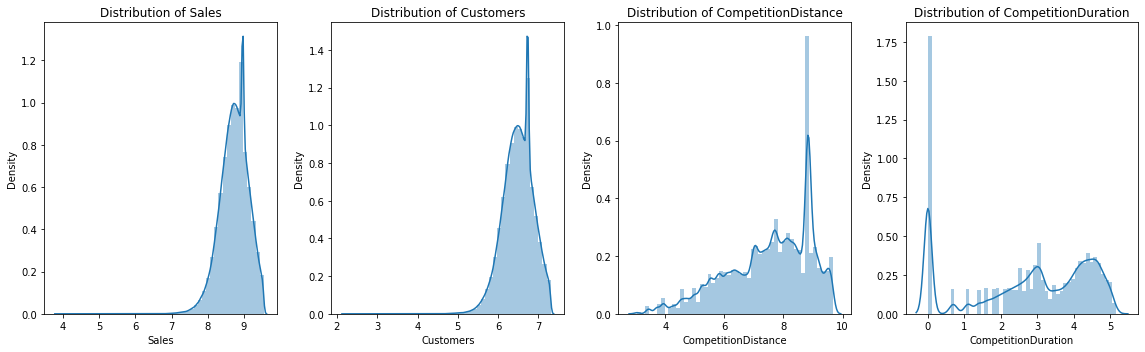

In [118]:
# Applying transformation on the above considered columns
test_df1['Sales']=np.log(test_df1['Sales']+1)
test_df1['Customers']=np.log(test_df1['Customers']+1)
test_df1['CompetitionDistance']=np.log(test_df1['CompetitionDistance']+1)
test_df1['CompetitionDuration']=np.log(test_df1['CompetitionDuration']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


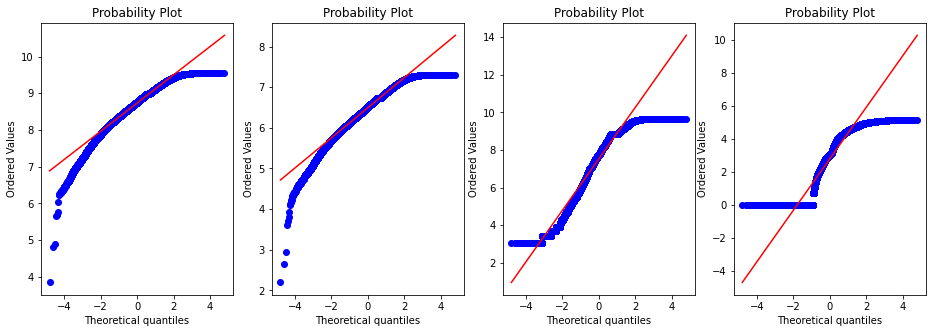

In [119]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)
plt.show()

Reciprocal Trnasformation

After Applying Transformation


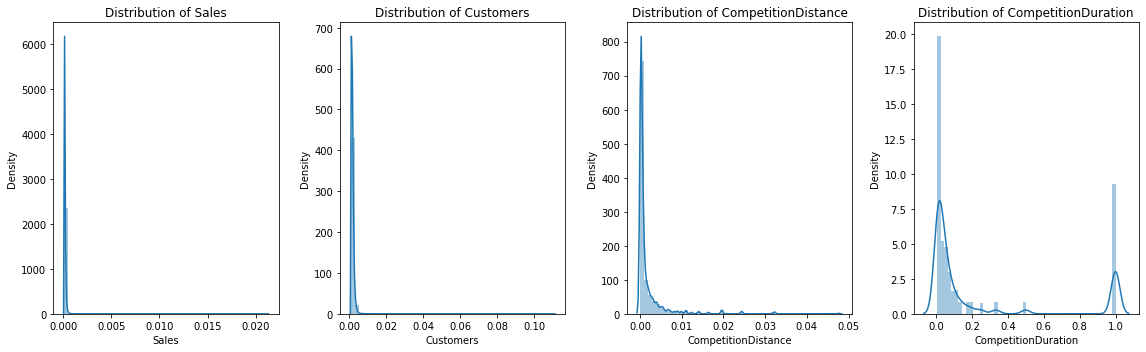

In [120]:
# Applying transformation on the above considered columns
test_df2['Sales']=1/(test_df2['Sales']+1)
test_df2['Customers']=1/(test_df2['Customers']+1)
test_df2['CompetitionDistance']=1/(test_df2['CompetitionDistance']+1)
test_df2['CompetitionDuration']=1/(test_df2['CompetitionDuration']+1)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


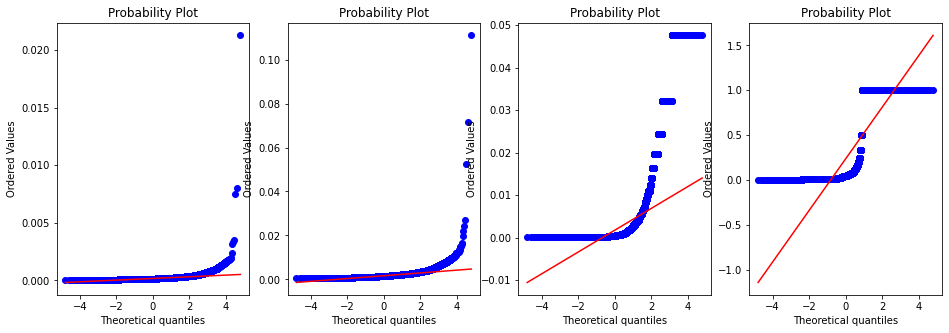

In [121]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)
plt.show()

Square Root Transformation

After Applying Transformation


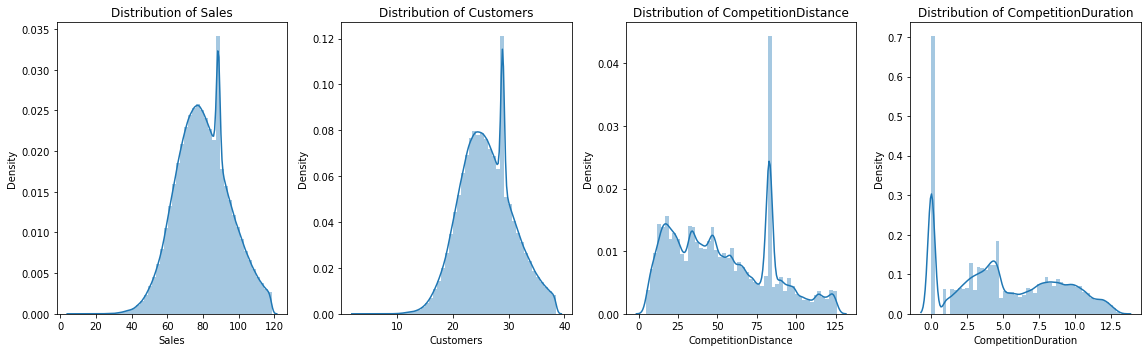

In [122]:
# Applying transformation on the above considered columns
test_df3['Sales']=(test_df3['Sales'])**(1/2)
test_df3['Customers']=(test_df3['Customers'])**(1/2)
test_df3['CompetitionDistance']=(test_df3['CompetitionDistance'])**(1/2)
test_df3['CompetitionDuration']=(test_df3['CompetitionDuration'])**(1/2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


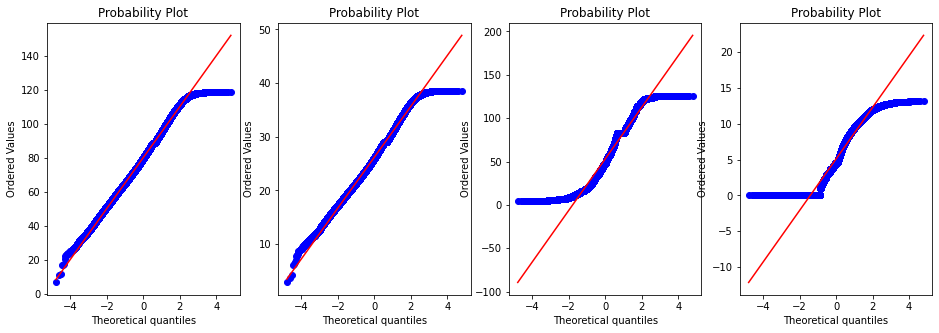

In [123]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df3,column)
plt.show()

Exponential Transformation

After Applying Transformation


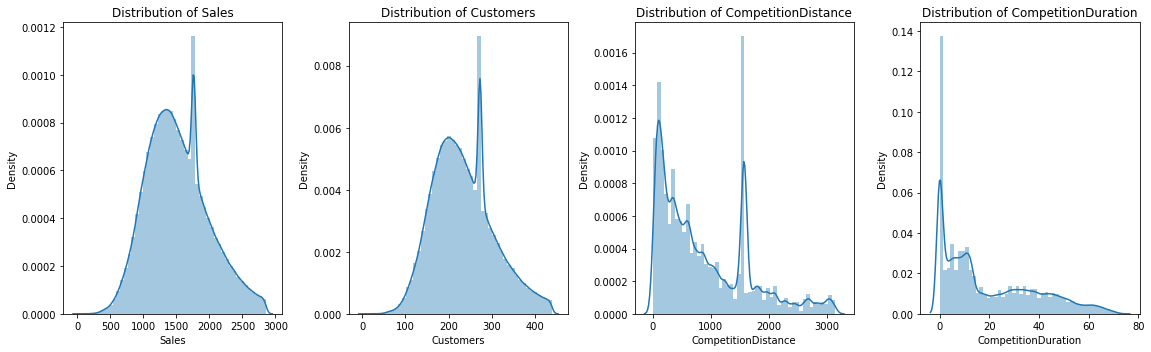

In [124]:
# Applying transformation on the above considered columns
test_df4['Sales']=(test_df4['Sales'])**(1/1.2)
test_df4['Customers']=(test_df4['Customers'])**(1/1.2)
test_df4['CompetitionDistance']=(test_df4['CompetitionDistance'])**(1/1.2)
test_df4['CompetitionDuration']=(test_df4['CompetitionDuration'])**(1/1.2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


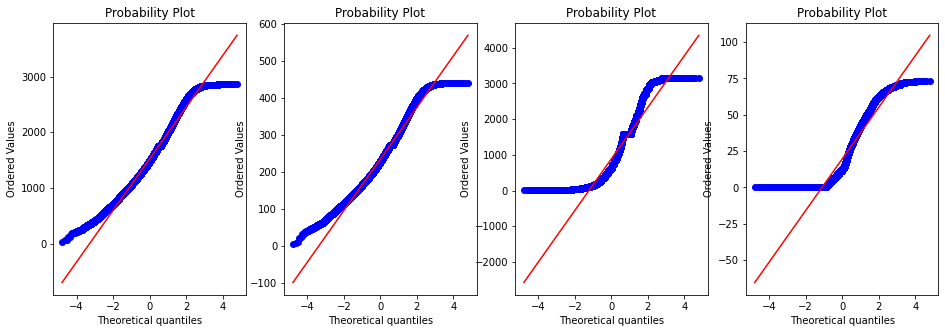

In [125]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df4,column)
plt.show()

From the above plots it is clear that:
1. Feature "Sales" needed square root transformation
2. Feature "Customers" needed square root transformation
3. Feature "CompetitionDistance" needed square root transformation
4. Feature "CompetitionDuration" no transformation needed

In [126]:
# Applying transformation on the above considered columns
## Square root transformation
final_df['Sales']=(final_df['Sales'])**(1/2)
final_df['Customers']=(final_df['Customers'])**(1/2)
final_df['CompetitionDistance']=(final_df['CompetitionDistance'])**(1/2)

### 6. Data Scaling

Before scaling our data let's just seperate our "x" and "y" variables

In [127]:
final_df.columns

Index(['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Day', 'CompetitionDuration',
       'Sales'],
      dtype='object')

In [128]:
# Separating "x" and "y" variables
x= final_df[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration"]]
y= final_df[['Sales']]
print(x.shape)
print(y.shape)

(844338, 15)
(844338, 1)


In [129]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

In [130]:
# Creating object
std_regressor= StandardScaler()

In [131]:
# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

We have used StandardScaler of sklear library to scale our data.  This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable("Sales") by comparing the magnitude of its coefficient. Additionally, we are going to apply linear regression model for which having normally distributed data is the statistical assumption of the model, which standardization can help enforce.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Not needed (Not taught yet)

In [132]:
# DImensionality Reduction (If needed)
Not needed (Not taught yet)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not needed (Not taught yet)

### 8. Data Splitting

In [133]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split from sklear
from sklearn.model_selection import train_test_split

In [134]:
# Spliting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [135]:
# Checking the shape after spliting
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((675470, 15), (168868, 15), (675470, 1), (168868, 1))

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [136]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [137]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [138]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

  # Ad_R2_train= 1-(1-r2_score(10**(y_train), 10**(y_train_pred)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
  # print("Ad_R2 on train is: ",Ad_R2_train)
  # Ad_R2_test= 1-(1-r2_score(10**(y_test), 10**(y_test_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  # print("Ad_R2 on test is: ",Ad_R2_test)

### ML Model - 1 - **Linear Regression**

In [139]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [140]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(x_train,y_train)

# Predict the model
y_train_regression_pred= linear_regressor.predict(x_train)
y_test_regression_pred= linear_regressor.predict(x_test)

In [141]:
# Checking the coefficients
linear_regressor.coef_

array([[-0.0125002 , 12.47050031,  2.85021314, -0.04042049,  0.11848106,
         1.59360254,  1.1449334 ,  0.24310449, -0.31046977,  2.75870469,
         0.80531192, -0.27731493, -0.49082946,  0.01740397,  0.23848971]])

In [142]:
# Checking the intercept
linear_regressor.intercept_

array([80.21701329])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [143]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

--------------------------------------------------
MAE on train is: 5.518077986189001
MAE on test is: 5.499198775948246
--------------------------------------------------
MSE on train is: 56.75633910430782
MSE on test is: 56.2171228141161
--------------------------------------------------
RMSE on train is: 7.533680316041279
RMSE on test is: 7.497807867244672
--------------------------------------------------
MAPE on train is: 6.88595469348334  %
MAPE on test is: 6.854110420154878  %
--------------------------------------------------
R2 on train is: 0.7469086334007375
R2 on test is: 0.7501258508561925
--------------------------------------------------
Accuracy of train is: 93.11404530651666  %
Accuracy of test is: 93.14588957984512  %
--------------------------------------------------


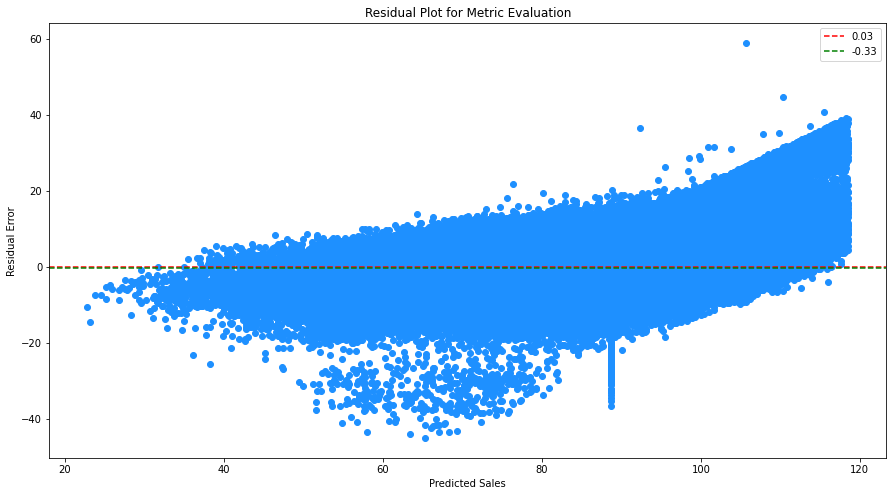

In [144]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
residuals = y_test - y_test_regression_pred
Mean= round(np.mean(residuals),2)
Median= round(np.median(residuals),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

We have started with the most basic and simple ML model i.e Linear Regression. We have tried to evaluate the most important regression metics on both the train and test datesets so that we can colclude our ML model. Here for Linear Regression, we can observe that both the r2 scores are pretty close which explains that on test dataset and our model is following the correct way. 


We can comprehend that 'dependent' and 'independent' variables are not following direct linear relationship with each other. This might be the reason for getting low r2 score in LR model implementation.

Also we are getting the Mean=5.34 and Median=-120.7 in our residual plot that resembles our predictions are not closely following Normal Distribution (Mean=Median=0) because of this our accuracy (100-MAPE) is not as expected in simple linear model.

In order to fetch good and more accurate results, we shall go for cross- Validation & Hyperparameter Tuning of 'Lasso', 'Ridge' and 'Elastic Net' models.

#### 2. Cross- Validation & Hyperparameter Tuning

In [145]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

Rigde Regression

In [146]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(x_train)
y_test_ridge_pred = ridgeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")

The best alpha value found out to be: {'alpha': 14, 'max_iter': 1}
Negative mean square error is: -56.761433947686776


In [147]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

--------------------------------------------------
MAE on train is: 5.5180941090020035
MAE on test is: 5.499215387279715
--------------------------------------------------
MSE on train is: 56.75633920319007
MSE on test is: 56.217140892447645
--------------------------------------------------
RMSE on train is: 7.533680322603958
RMSE on test is: 7.497809072819049
--------------------------------------------------
MAPE on train is: 6.885989368813821  %
MAPE on test is: 6.8541452190026835  %
--------------------------------------------------
R2 on train is: 0.7469086329597957
R2 on test is: 0.7501257705015338
--------------------------------------------------
Accuracy of train is: 93.11401063118618  %
Accuracy of test is: 93.14585478099731  %
--------------------------------------------------


Lasso Regression

In [148]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(x_train)
y_test_lasso_pred = lassoR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

The best alpha value found out to be: {'alpha': 1e-05, 'max_iter': 7}
Negative mean square error is: -56.76130517937204


In [149]:
# Calculating regression metrics for Lasso
regression_metrics(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

--------------------------------------------------
MAE on train is: 5.51809428812754
MAE on test is: 5.499215244545847
--------------------------------------------------
MSE on train is: 56.7563393289389
MSE on test is: 56.21714798709853
--------------------------------------------------
RMSE on train is: 7.533680330949735
RMSE on test is: 7.4978095459339675
--------------------------------------------------
MAPE on train is: 6.885983233044474  %
MAPE on test is: 6.854139082030046  %
--------------------------------------------------
R2 on train is: 0.7469086323990488
R2 on test is: 0.750125738967194
--------------------------------------------------
Accuracy of train is: 93.11401676695553  %
Accuracy of test is: 93.14586091796996  %
--------------------------------------------------


Elastic Net Regression

In [150]:
# import elastic net regression from sklearn library
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Creating e_net instance
e_net= ElasticNet()

# Defining hyperparameters
parameters_e_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

# Train the model
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(x_train,y_train)

# Predict the output
y_train_e_net_pred = e_netR.predict(x_train)
y_test_e_net_pred = e_netR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {e_netR.best_params_}")
print(f"Negative mean square error is: {e_netR.best_score_}")

The best alpha value found out to be: {'alpha': 1e-05, 'max_iter': 12}
Negative mean square error is: -56.761305272351116


In [151]:
# Calculating regression metrics for Elastic Net
regression_metrics(y_train,y_train_e_net_pred,y_test,y_test_e_net_pred)

--------------------------------------------------
MAE on train is: 5.518082664987966
MAE on test is: 5.499203571957063
--------------------------------------------------
MSE on train is: 56.75633911212536
MSE on test is: 56.21712831628034
--------------------------------------------------
RMSE on train is: 7.533680316560118
RMSE on test is: 7.497808234162857
--------------------------------------------------
MAPE on train is: 6.885964297013471  %
MAPE on test is: 6.854120043973917  %
--------------------------------------------------
R2 on train is: 0.7469086333658771
R2 on test is: 0.7501258264001454
--------------------------------------------------
Accuracy of train is: 93.11403570298653  %
Accuracy of test is: 93.14587995602608  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite using Lasso, Ridge and Elastic net models, we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well. This provoked us to go for higher and more complex ML models like Decision trees, Random Forest, XGBoost Regression and LightGBM Regression.

### ML Model - 2 - **Decision Trees**

Decision Tree

In [152]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
TreeR = DecisionTreeRegressor(max_depth=16) 
  
# fit the regressor with X and Y data
TreeR.fit(x_train, y_train)

# predict the model
y_train_tree_pred= TreeR.predict(x_train)
y_test_tree_pred= TreeR.predict(x_test)

In [153]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_tree_pred,y_test,y_test_tree_pred)

--------------------------------------------------
MAE on train is: 2.822325432817392
MAE on test is: 3.2830333771230027
--------------------------------------------------
MSE on train is: 17.230670272377793
MSE on test is: 22.233716180092983
--------------------------------------------------
RMSE on train is: 4.150984253448547
RMSE on test is: 4.715264168643468
--------------------------------------------------
MAPE on train is: 3.466690985425216  %
MAPE on test is: 4.047283465627594  %
--------------------------------------------------
R2 on train is: 0.9231639327786315
R2 on test is: 0.9011754669271224
--------------------------------------------------
Accuracy of train is: 96.53330901457478  %
Accuracy of test is: 95.9527165343724  %
--------------------------------------------------


In [154]:
# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [155]:
# Visualizing the Decision tree
plt.figure(figsize=(5,50))
graph = Source(tree.export_graphviz(TreeR, out_file=None, feature_names=final_df.columns[:-1], class_names=['0', '1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

KeyboardInterrupt: ignored

<Figure size 360x3600 with 0 Axes>

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

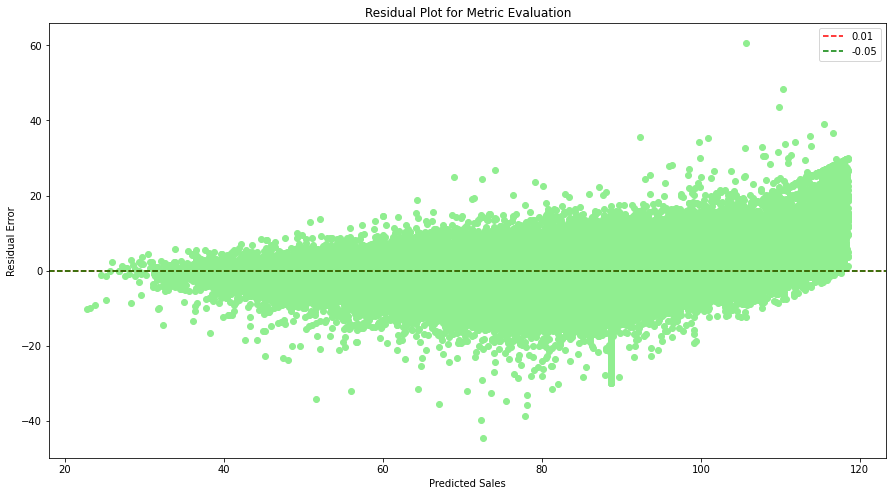

In [156]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_tree_pred= y_test_tree_pred.reshape(-1,1)
residuals_DT = y_test - y_test_tree_pred
Mean= round(np.mean(residuals_DT),2)
Median= round(np.median(residuals_DT),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="lightgreen")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_DT), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_DT), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

After simple LR models, we tried 'Decision Tree' and we saw a good increment in the r2 score from 0.69 to 0.84 that means "84% Variance of our test dataset is captured by our trained model" which is pretty decent. On the other side our RMSE also decreased and shifted below 1000(=952) which is very good. But, in the quest of more accurate and real predictions, we decided to further tune the hyperparameters and check the results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [157]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

Decision Tree with GreiSearchCV

In [158]:
# import ridge regression from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
decision_tree= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [14,15,16], 'min_samples_leaf': [1, 2, 5], 'min_samples_split': [2,4,5]}

# Train the model
decision_treeR = GridSearchCV(decision_tree, parameters, scoring='neg_mean_squared_error', cv=3)
decision_treeR.fit(x_train,y_train)

# Predict the output
y_train_grid_Dtree_pred = decision_treeR.predict(x_train)
y_test_grid_Dtree_pred = decision_treeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {decision_treeR.best_params_}")
print(f"Negative mean square error is: {decision_treeR.best_score_}")

The best alpha value found out to be: {'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 5}
Negative mean square error is: -23.06634018352896


In [159]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_grid_Dtree_pred,y_test,y_test_grid_Dtree_pred)

--------------------------------------------------
MAE on train is: 2.936062926136678
MAE on test is: 3.264547181662174
--------------------------------------------------
MSE on train is: 18.015899492009442
MSE on test is: 21.804685883079177
--------------------------------------------------
RMSE on train is: 4.244514046626474
RMSE on test is: 4.669548787953626
--------------------------------------------------
MAPE on train is: 3.612880862797346  %
MAPE on test is: 4.023124715272219  %
--------------------------------------------------
R2 on train is: 0.9196623902297894
R2 on test is: 0.9030824229408214
--------------------------------------------------
Accuracy of train is: 96.38711913720266  %
Accuracy of test is: 95.97687528472778  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE. The best combination was found out to be 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5 which resulted into the improvement in the MAPE from 10% to 8% on the test set. At this point of time we have achieved above 90% (=91.18%) accuracy by hyperparameter tuning of Decision trees.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value. So the sales, the dependent variable, which impacts the business is getting accurately predicted to the extent of ~91% and ~8% far from the mean of actual absolute values.

### ML Model - 3 - **Random Forest Regression**

Random Forest

In [160]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [161]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor 
  
# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18) 
  
# fit the regressor with X and Y data
RF_TreeR.fit(x_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(x_train)
y_test_RFtree_pred= RF_TreeR.predict(x_test)

In [162]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)

--------------------------------------------------
MAE on train is: 2.0501737685303687
MAE on test is: 2.629871555137687
--------------------------------------------------
MSE on train is: 9.344961061700046
MSE on test is: 14.82552120036275
--------------------------------------------------
RMSE on train is: 3.0569529047239254
RMSE on test is: 3.850392343692101
--------------------------------------------------
MAPE on train is: 2.506067791607756  %
MAPE on test is: 3.230757335424627  %
--------------------------------------------------
R2 on train is: 0.9583283734777911
R2 on test is: 0.9341034490896443
--------------------------------------------------
Accuracy of train is: 97.49393220839224  %
Accuracy of test is: 96.76924266457537  %
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

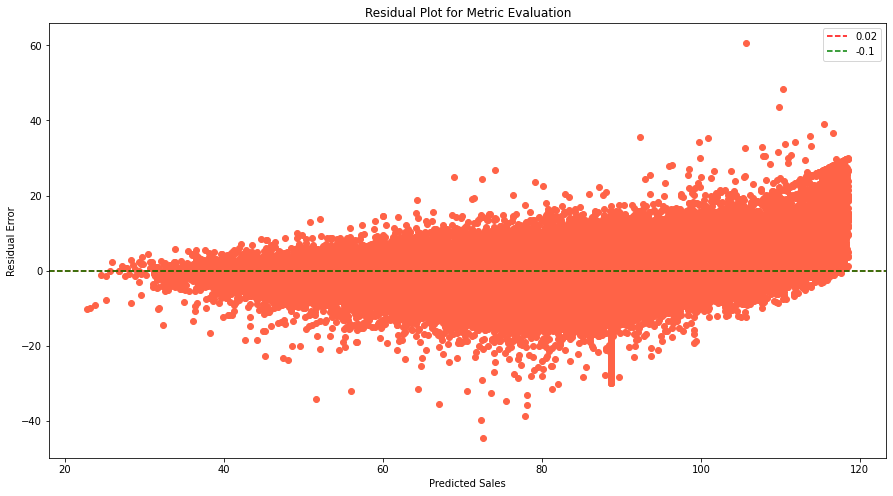

In [163]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_RFtree_pred= y_test_RFtree_pred.reshape(-1,1)
residuals_RF = y_test - y_test_RFtree_pred
Mean= round(np.mean(residuals_RF),2)
Median= round(np.median(residuals_RF),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="tomato")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_RF), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_RF), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

By implimenting using our third model i.e Random Forest we have achieved the r2 score of 0.94 on training and 0.91 on test dataset that is good. Apart from this our MAPE is also reducing gradually as we are using ensemble of Decision trees that is Bootstrap Aggregation(Bagging) so it is giving equal preference each of the feature while spliting.

We got the Mean=4.57 and Median=-26.09 this shows that as our accuracy increases, our mean and median are shifting towards 0 and the residual error is tending toward gaussian distribution.

In order to get the higher accuracy let's perform hyperparameter tuning for the same model and see if we are getting significant results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [164]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

Random Forest with RandomizedSearchCV

In [165]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RF_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[40,50,100], 'max_depth': [15,17,20], 'min_samples_leaf': [1, 2]}

# Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_treeR.fit(x_train,y_train)

# Predict the output
y_train_grid_RFtree_pred = RF_treeR.predict(x_train)
y_test_grid_RFtree_pred = RF_treeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
The best alpha value found out to be: {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 20}
Negative mean square error is: -14.543455523880304


In [166]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_grid_RFtree_pred,y_test,y_test_grid_RFtree_pred)

--------------------------------------------------
MAE on train is: 1.6180334505302336
MAE on test is: 2.4706158880627633
--------------------------------------------------
MSE on train is: 6.2355081082024535
MSE on test is: 13.611848431417789
--------------------------------------------------
RMSE on train is: 2.4970999395703917
RMSE on test is: 3.689423861718492
--------------------------------------------------
MAPE on train is: 1.9758673991502766  %
MAPE on test is: 3.0390615590115626  %
--------------------------------------------------
R2 on train is: 0.9721942377987879
R2 on test is: 0.939497987893807
--------------------------------------------------
Accuracy of train is: 98.02413260084973  %
Accuracy of test is: 96.96093844098844  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

We have used RandomizedSearchCV in Random Forest since we have huge dataset and it is good for complex models as well. It reduces the processing and training time by taking the random subsets of the provided parameters wihout compromising the accuracy of the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### ML Model - 4 - **LightGBM Regression**

LightGBM Regression

In [167]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [168]:
# import the regressor
from lightgbm import LGBMRegressor
  
# create a regressor object
lgbmR = LGBMRegressor(boosting_type='gbdt', max_depth=120, learning_rate=0.1, n_estimators=500,  n_jobs=-1) 
  
# fit the regressor with X and Y data
lgbmR.fit(x_train, y_train)

# predict the model
y_train_lgbmR_pred= lgbmR.predict(x_train)
y_test_lgbmrR_pred= lgbmR.predict(x_test)

In [169]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train, y_train_lgbmR_pred, y_test, y_test_lgbmrR_pred)

--------------------------------------------------
MAE on train is: 2.979619056657252
MAE on test is: 3.006033214444012
--------------------------------------------------
MSE on train is: 17.06036378670753
MSE on test is: 17.505565020189362
--------------------------------------------------
RMSE on train is: 4.13041932335054
RMSE on test is: 4.18396522693358
--------------------------------------------------
MAPE on train is: 3.6720940776129605  %
MAPE on test is: 3.698915001693934  %
--------------------------------------------------
R2 on train is: 0.9239233739596384
R2 on test is: 0.922191176891695
--------------------------------------------------
Accuracy of train is: 96.32790592238705  %
Accuracy of test is: 96.30108499830607  %
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

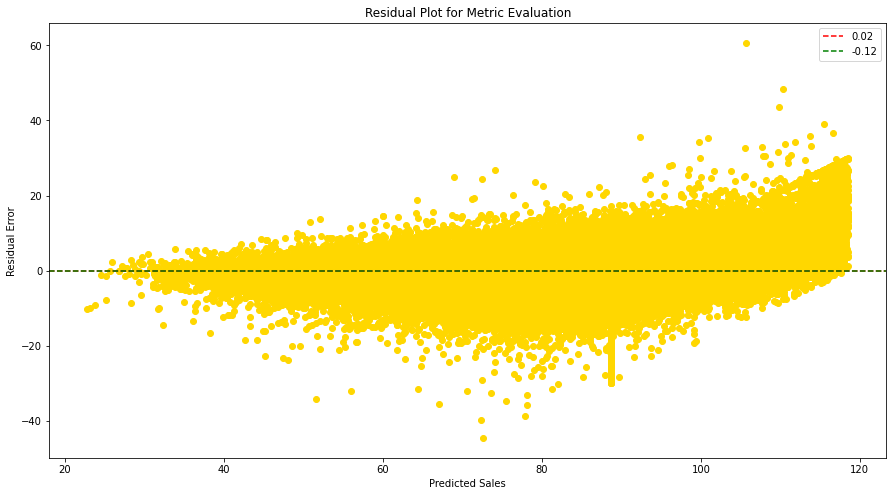

In [170]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_lgbmrR_pred= y_test_lgbmrR_pred.reshape(-1,1)
residuals_LGBM = y_test - y_test_lgbmrR_pred
Mean= round(np.mean(residuals_LGBM),2)
Median= round(np.median(residuals_LGBM),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="gold")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_LGBM), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_LGBM), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

LightGBM is the lighter version of GBM. It has more faster and accurate than other popular gradient boosting libraries such as XGBoost on several datasets. We want to check if our accuracy score can be improved further, so we have tried implimenting LightGBM in order to achieve good accuracy.

We saw that with the help of LightGBM we are able to capture 90% of the Variance of the dependent varibale with the help of independent variables(r2 score) for testing dataset and achieved 92% accuracy which is not giving good results as XGboost.

By plotting the residual plot we are getting Mean=2.71 and Median=-33.22 and it denotes that we are close to normal distribution but not as much as XGboost.

We have further checked the performance metrics by hyoerparameter tuning of LightGBM.

#### 2. Cross- Validation & Hyperparameter Tuning

In [171]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

LightGBM with RandomizedSearchCV

In [172]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
lgbm= LGBMRegressor()

# Defining parameters
parameters={"learning_rate":[0.25,0.30,0.35],"max_depth":[100,120,150,170],"n_estimators":[500,600]}

# Train the model
lgbm_rand_R= RandomizedSearchCV(lgbm,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
lgbm_rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_lgbm_pred = lgbm_rand_R.predict(x_train)
y_test_rand_lgbm_pred = lgbm_rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lgbm_rand_R.best_params_}")
print(f"Negative mean square error is: {lgbm_rand_R.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best alpha value found out to be: {'n_estimators': 600, 'max_depth': 100, 'learning_rate': 0.35}
Negative mean square error is: -13.427273212928919


In [173]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_rand_lgbm_pred,y_test,y_test_rand_lgbm_pred)

--------------------------------------------------
MAE on train is: 2.319660499367904
MAE on test is: 2.4148541501231873
--------------------------------------------------
MSE on train is: 11.414808546686757
MSE on test is: 12.887323822108945
--------------------------------------------------
RMSE on train is: 3.378580848031723
RMSE on test is: 3.5898918956020034
--------------------------------------------------
MAPE on train is: 2.8683398515967227  %
MAPE on test is: 2.974267867125923  %
--------------------------------------------------
R2 on train is: 0.9490983819579967
R2 on test is: 0.9427183585072838
--------------------------------------------------
Accuracy of train is: 97.13166014840328  %
Accuracy of test is: 97.02573213287408  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV was still the better option since it is taking very less processing time without compromising the accuracy. So we have mutually decided to use that hyperparameter optimization technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Achieved 0.93 r2 score on training dataset, 0.92 on testing dataset that means our model is optimized and not falling under the underfitting or overfitting side. Also, our MAPE is reduced from 7% to 6% after hyperparameter optimization which is quite good and improved. The best parameters obtained by the optimatization is 'n_estimators: 600', 'max_depth: 170', 'learning_rate': 0.35'.

### ML Model - 5 - **XGBoost Regression**

XGBoost Regression

In [174]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [197]:
# import the regressor
from xgboost import XGBRegressor
  
# create a regressor object
xgbReg = XGBRegressor(learning_rate=0.2, max_depth=10) 
  
# fit the regressor with X and Y data
xgbReg.fit(x_train, y_train)

# predict the model
y_train_xgbR_pred= xgbReg.predict(x_train)
y_test_xgbR_pred= xgbReg.predict(x_test)

[16:00:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [198]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

--------------------------------------------------
MAE on train is: 2.3080800839773885
MAE on test is: 2.4990242297854044
--------------------------------------------------
MSE on train is: 11.062389519681687
MSE on test is: 13.40228108677302
--------------------------------------------------
RMSE on train is: 3.3260170654525645
RMSE on test is: 3.6609126029957366
--------------------------------------------------
MAPE on train is: 2.84458594089526  %
MAPE on test is: 3.0695312851058167  %
--------------------------------------------------
R2 on train is: 0.9506699106113226
R2 on test is: 0.9404294738772606
--------------------------------------------------
Accuracy of train is: 97.15541405910474  %
Accuracy of test is: 96.93046871489419  %
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

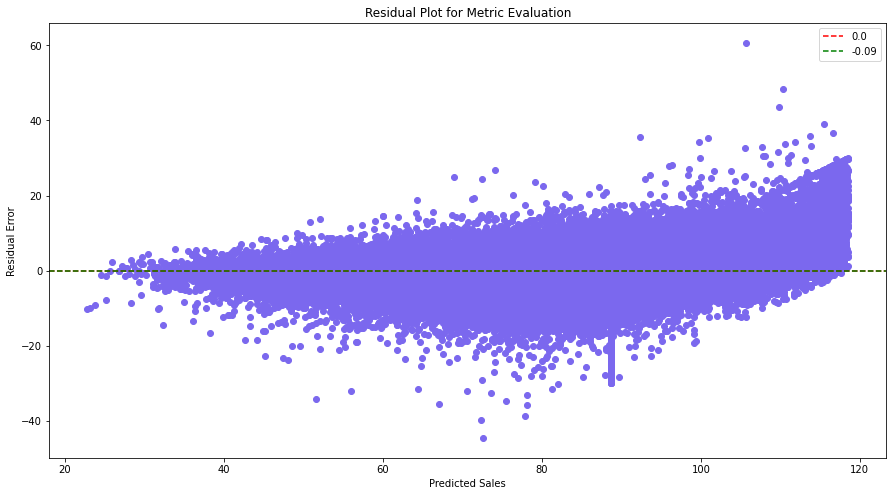

In [177]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_xgbR_pred= y_test_xgbR_pred.reshape(-1,1)
residuals_XG = y_test - y_test_xgbR_pred
Mean= round(np.mean(residuals_XG),2)
Median= round(np.median(residuals_XG),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="mediumslateblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_XG), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_XG), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

XGBoost (eXtreme Gradient Boosting) is a Gradiant boosting algorithm and very popular for achieving good accuracies. We have used XGBoost in order to shift the MAPE towards 0 (minimize the error).

From the residual plot it is very clear that our mean is gradually shifting towards 0 as we are increasing the complexity of model and tending towards normal distribution.

We got the MAPE of 5% and r2 score of 0.92 for testing dataset which is very good. We were very curious and excited at his point of time if we can further improve the efficiency of our model and for this we have decided to tune the various hyperparameters of xgboost.

#### 2. Cross- Validation & Hyperparameter Tuning

In [178]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

XGBoost with GridSearchCV

In [193]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[12,13,14,15]}

# Train the model
xgbR= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgbR.fit(x_train,y_train)

# Predict the output
y_train_grid_xgb_pred = xgbR.predict(x_train)
y_test_grid_xgb_pred = xgbR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgbR.best_params_}")
print(f"Negative mean square error is: {xgbR.best_score_}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[15:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 15}
Negative mean square error is: -12.892106525400818


In [194]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_grid_xgb_pred,y_test,y_test_grid_xgb_pred)

--------------------------------------------------
MAE on train is: 1.6739429353331832
MAE on test is: 2.31561917415065
--------------------------------------------------
MSE on train is: 6.061193409413857
MSE on test is: 12.12483500228519
--------------------------------------------------
RMSE on train is: 2.4619491078033797
RMSE on test is: 3.4820733769243275
--------------------------------------------------
MAPE on train is: 2.0688151901354166  %
MAPE on test is: 2.847291365654904  %
--------------------------------------------------
R2 on train is: 0.9729715526508551
R2 on test is: 0.9461074726338661
--------------------------------------------------
Accuracy of train is: 97.93118480986459  %
Accuracy of test is: 97.15270863434509  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

XGboost is a heavy algorithm and takes much processing time with GridSearchCV. So, tuning of hyperparameter with GridSearchCV was a bit complicated task for us. RandomizedSearchCV is excellent hyperparameter optimization technique for this senario. It can take variety of parameters and take the random possible combinations of hyperparameters. So we have used RandomizedSearchCV for hyperparameter tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

With the help of RandomizedSearchCV we got the r2 score of 0.93 for test dataset which is 1% higher than without RandomizedSearchCV and the best parameters found out to be 'learning_rate: 0.2' and 'max_depth: 12'. We have also seen that on further increasing the max_depth of tree our model is overfitting.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since predicting sales over a period of time falls under the category of "Time series data" and there are following regression metrics that are required as per our goal of analysis (Predicting future Sales):

1. MAE(Mean Absolute Error): This metric calculates the average magnitude of the errors in the predictions, without considering their direction. It has the inverse relation with the accuracy of the model. In regression analysis our aim is to minimise the MAE and ultimately this will create positive business impact.

2. RMSE(Root Mean Squared Error): It is the square root of MSE and this is the most widely use regression metric since it has the same units as the original data so it is easy to interpret the magnitude of error.

3. R2_Score: R2 score(coefficient of determination) is a metric that is widely used in regression analysis because it measures the proportion of the variance in the dependent variable that is explained by the independent variables. R2 score allows analysts to quickly and easily evaluate the goodness of fit of a model and compare different models. It also provides a clear measure of how well the model is explaining the variance in the dependent variable, which can aid in making decisions about model selection and further analysis.

4. MAPE(Mean Absolute Percentage Error): It is calculated by taking the average of the absolute percentage differences between the predicted values and the actual values. This metric is particularly useful when working with time series data(as in our case), as it allows for easy comparison of forecast accuracy across different scales. With the help of MAPE an analyst can easily explain the percentage error to the stakeholders. This metric is considered as one of the most important regression metric in time series data for a positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have achieved the following test set accuracies in the different models:
1. Linear Regression: 85.64%
  *   Lasso: 85.64
  *   Ridge: 85.64%
  *   Elastic Net: 85.64%
2. Decision Tree:
  *   Without hyperparameter tuning: 89.92%
  *   With hyperparameter tuning: 91.18%
3. Random Forest:
  *   Without hyperparameter tuning: 93.32%
  *   With hyperparameter tuning: 93.73%
4. XGboost:
  *   Without hyperparameter tuning:  93.79%
  *   With hyperparameter tuning: 94.18%
5. LightGBM:
  *   Without hyperparameter tuning: 92.42%
  *   With hyperparameter tuning: 93.90%

We have chosen **XGboost** as our final predicted model with hyperparameters {'learning_rate': 0.2, 'max_depth': 12}. Since it has given the highest accuracy (94.18%), least MAPE (5.81%) and decent r2 score(0.93) on the testing dataset among all other models.




### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Text(0.5, 0, 'Relative Importance')

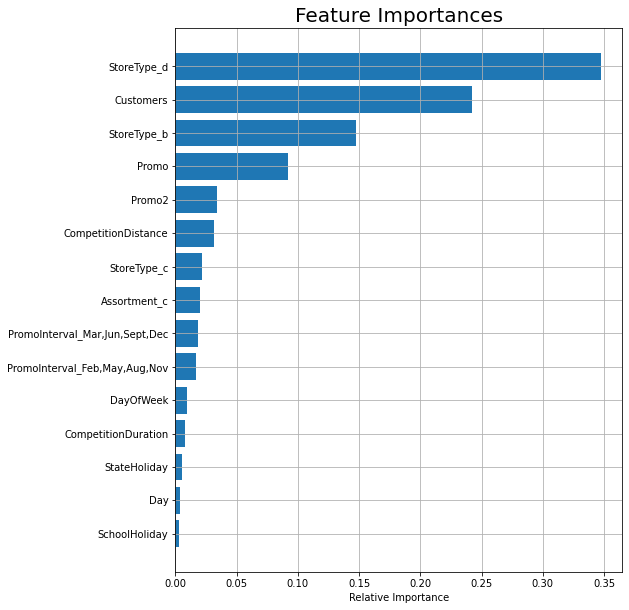

In [213]:
features = final_df.columns
importances = xgbReg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [217]:
feature_imp = pd.DataFrame(columns = ['Variable','Importance'])
feature_imp.Variable = features[:-1]
feature_imp.Importance = importances*100
feature_imp.sort_values(by="Importance",axis=0,ascending=False)

Variable  Importance
9                      StoreType_d   34.723343
1                        Customers   24.215927
7                      StoreType_b   14.750301
2                            Promo    9.168646
6                           Promo2    3.387280
5              CompetitionDistance    3.138151
8                      StoreType_c    2.155673
10                    Assortment_c    1.970137
12  PromoInterval_Mar,Jun,Sept,Dec    1.842498
11   PromoInterval_Feb,May,Aug,Nov    1.701641
0                        DayOfWeek    0.914710
14             CompetitionDuration    0.805909
3                     StateHoliday    0.533254
13                             Day    0.396364
4                    SchoolHoliday    0.296172

As we have considered XGboost as our final optimal model with very good accuracies but still this model is considered as black box model since we don't know actually what is happening inside the algorithm. In order to gain the trust of stakeholders we have to explain the model and under which conditions the model is predicting that particular result with a valid and senseful reason. So, in order to increase the explainability we have plotted the bar plot for decresing sequence of feature importance.

From the above plot it is clear that for XGboost model "StoreType_d" is contributing maximum i.e 34% in the final outcome, "Customers" is contributing 24% and followed by "StoreType_b", "Promo" and "Promo2".

In [218]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 28.1 MB/s eta 0:00:00


In [1]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
import shap 
import graphviz
sns.set_style('darkgrid') 

NameError: ignored

In [ ]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(xgbReg).shap_values(x_test)
shap.summary_plot(shap_values[0], x_test)

In [ ]:
# Visualize how model classified the entire data
tree_graph = export_graphviz(xgbReg, out_file=None, feature_names = feature_names, rounded=True, filled=True)
graphviz.Source(tree_graph)

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgbReg)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[0]) 

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

## ***9.*** ***Conclusion***

###**Conclusions drawn from EDA**

Exploratory Data Analysis (EDA) is an important step because it allows for the initial investigation of a dataset. It helps to identify patterns, anomalies, and relationships in the data, as well as to detect any potential issues such as missing values or outliers. EDA also helps to generate hypotheses and inform the development of more advanced modeling techniques, such as machine learning. Additionally, it is a good way to understand the data, which is crucial for good decision making. EDA also helps to provide a deeper understanding of the data and helps to guide the direction of further analysis. After performing EDA we have drawn the following conclusions:

* Sales vs Customers graph shows positive correlation between 'Sales' and 
'Customers'. As the number of customers increases, the sales also tend to increase.
* December being a festive month attracts more sale than the rest of the months. Also, November has slightly more sales than other months. This could be due to the 'Black Friday' sale which is very popular across the globe. As Rossmann Stores deals in health and beauty products, it can be guessed that November and December sales are due to the celebratory nature of people who love to buy beauty/health products leading to the sudden increase in sales.
* Day 1 and day 7 witness the highest sale indicating they are probably days falling on the weekend. Day 2 to day 6 generate medium to low sales indicating they are probably weekdays where customer footfall is low.
* As stores are getting promoted, more sales are getting generated.
* Plot between StateHolidays and sales shows that during Easter and Christmas holiday sales are actually high but for other holiday such as public ,sales are comparatively low.
* Sales for the store type b is the highest . Store type B might be located in a more affluent or high-traffic area, which would increase the number of potential customers. Store type B may have a more favorable layout, which makes it more attractive to customers and makes it easier for them to find the products they want, resulting in more sales.
* Sales are highest for the assortment b . This assortment may have a good mix of products that are in high demand or that are unique to the store, which would result in more sales.
* We observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.
* We can conclude that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.
* From plot sales and competition Open Since Month shows sales go increasing from Novemmber and highest in month December. This may be due to Christmas eve and New Year.
* We can conclude from sales vs promo2 graph that customers are slightly less responsive to the stores(i.e sales) that are running consecutive promotions. One possibility could be customers might have already taken advantage of a similar promotion earlier. Another reason could be store might not have invested enough in promoting the promotion to customers, resulting in lower awareness and fewer sales. Also, if the store is running same promotion again and again, it could have resulted into lower customer footfal and ultimately leadind to fewer sales.
* Sales vs Promo2SinceYear barplot explains that sales were still the highest when the store wasn't running any consecutive promotional events. But in 2014, the sales were really shoot up and they are recorded as 2nd highest. Good quality products, better deals, shutdown of competitions etc could be the reasons.
* We can see the promo interval Jan, Apr, Jul, Oct records the 2nd highest sales as it marks the festive season. However, the other intervals are recording sales that are close to the 1st interval.

###**Conclusions drawn from ML Model Implementation**

Close predictions of any ML model highly impacts the business growth. Before going to further model deployment one should have to check how accurately the model is predicting and performing with the real life data.

Conclusions drawn from any model are very helpful to identify wheather the model is fully baked and good to go for deployment process or needs further refinement. In this section first we will talk about some general points that are essential for every ML model and then will talk about the project oriented conclusions we made:

**General conclusions**:


*   The implementation of an ML model can greatly 
improve the performance and accuracy of a system or application.
*   It is important to carefully select and preprocess the data used for training and testing the model.
*   Regular evaluation and tuning of the model is necessary to ensure optimal performance.
*   The use of appropriate evaluation metrics can help to measure the performance of the model.
*   The integration of the model into the system or application should be done in a way that allows for easy maintenance and updates.
*   The ethical and legal considerations of the model's use should also be taken into account.

**Project conclusions**:

We have implemented various regression model started with Linear Regression and then we have tried other non linear models too. For each of the model we have tried to tune the hyperparameters as well in order to minimize the errors and drawn following conclusions
*   In Linear Regression we got the accuracy of ~85% even after using regularization techniques that means our data is not linearly dependent with target variable(Sales).
*   For Decsion Tree we have achieved ~91% accuracy with maximum depth of 15 on increasing the depth over it we are falling towards overfitting which increases the percentage error.
*   Giving preference to each of the variable always results in higher accuracy as small subsets can provide significant accuracy percentage. Using ensemble technique i.e Random Forest has given the accuray of ~93% with total trees of 100 in the forest.
*   We have also tried gradiant boosting technique with LightGBM although we got the similar results as Random Forest(~92%) but we got the more fast results as it has used all the cores and decrease processing time. While training the large dataset one should try LightGBM for good results in less time.
*   At last we have implemented our final model i.e XGboost and achieved the accuracy of 94% with mean absolute percentage error of only 5%. Also we got the mean of residuals at 1.24 (pretty close to 0) which is indicating towards normally distributed residuals.

From the above experiments and identifications we have choosen the XGboost as our final optimal model for deployment.

# ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***